# Set up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm
from functools import reduce
import json
import os

torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [2]:
asignaciones = json.loads(open("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/asignaciones.json", "r", encoding='utf8').read())

# Modularización

## General

In [3]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length - 1):
        _x = data[i : (i + seq_length)]
        _y = data[i + seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x), np.array(y)


def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


color_pal = [
    "#F8766D",
    "#D39200",
    "#93AA00",
    "#00BA38",
    "#00C19F",
    "#00B9E3",
    "#619CFF",
    "#DB72FB",
]  # Paleta de colores Rojo - Naranja - Verdes - Azules - Morado

sc = MinMaxScaler()


def medirPrecision(model, dataX, dataY):
    model.eval()
    train_predict = model(dataX)

    data_predict = train_predict.data.cpu().numpy()
    dataY_plot = dataY.data.cpu().numpy()

    data_predict = sc.inverse_transform(data_predict)
    dataY_plot = sc.inverse_transform(dataY_plot)

    mse = mean_squared_error(dataY_plot, data_predict)
    mape = mean_absolute_percentage_error(dataY_plot, data_predict)

    print("MSE: " + str(mse.item()) + " MAPE: " + str(mape.item()))

    return mse
    # Para poder ver mejor los datos, vamos a normalizar las pérdidas
    # temp_df = eficiencia.copy()
    # temp_df['Pérdida'] = MinMaxScaler().fit_transform(np.array(temp_df['Pérdida']).reshape(-1,1))
    # eficiencia.plot(x='Época', y='Pérdida', xlim=(0,500))
    # plt.show()
    # eficiencia.plot(x='Época', y='Pérdida')
    # plt.show()

In [4]:
def concatenarAnnos(nombre: str):
    anno12 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2012-01-01_2012-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno13 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2013-01-01_2013-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno14 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2014-01-01_2014-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno15 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2015-01-01_2015-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno16 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2016-01-01_2016-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno17 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2017-01-01_2017-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno18 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2018-01-01_2018-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno19 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2019-01-01_2019-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno20 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2020-01-01_2020-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno21 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2021-01-01_2021-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno22 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2022-01-01_2022-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)

    annoDF = pd.concat([anno12, anno13,anno14,anno15,anno16,anno17,anno18,anno19,anno20,anno21,anno22], axis=0)
    
    #annoDF.rename(columns={'Reserva' : nombre},inplace=True) #Reactivar si se vuelve a los varios pantanos
    
    return annoDF

In [5]:
def concatenarReservas(pantanos : list):
    sol = reduce(lambda  left,right: pd.merge(left,right,on="Fecha"), pantanos)
    return sol

In [6]:
def concatenarAnnos8(nombre: str):
    anno15 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2015-01-01_2015-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno16 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2016-01-01_2016-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno17 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2017-01-01_2017-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno18 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2018-01-01_2018-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno19 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2019-01-01_2019-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno20 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2020-01-01_2020-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno21 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2021-01-01_2021-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)
    anno22 = pd.read_csv("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/"+nombre+"/"+nombre+" 2022-01-01_2022-12-30.csv", index_col=[0], parse_dates=True, dayfirst=True)

    annoDF = pd.concat([anno15,anno16,anno17,anno18,anno19,anno20,anno21,anno22], axis=0)
    
    annoDF.rename(columns={'Reserva' : nombre},inplace=True)
    
    return annoDF

In [7]:
def concatenarEstaciones11(estacion:str):
    
    
    anno12 = pd.read_json("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/AEMET/" + estacion + "/" + estacion +" 2012-01-01_2012-12-30.json", convert_dates=True)
    anno12['fecha'] = pd.to_datetime(anno12['fecha'], utc = False)
    anno12.set_index('fecha',inplace=True)
    anno13 = pd.read_json("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/AEMET/" + estacion + "/" + estacion +" 2013-01-01_2013-12-30.json", convert_dates=True)
    anno13['fecha'] = pd.to_datetime(anno13['fecha'], utc = False)
    anno13.set_index('fecha',inplace=True)
    anno14 = pd.read_json("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/AEMET/" + estacion + "/" + estacion +" 2014-01-01_2014-12-30.json", convert_dates=True)
    anno14['fecha'] = pd.to_datetime(anno14['fecha'], utc = False)
    anno14.set_index('fecha',inplace=True)
    anno15 = pd.read_json("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/AEMET/" + estacion + "/" + estacion +" 2015-01-01_2015-12-30.json", convert_dates=True)
    anno15['fecha'] = pd.to_datetime(anno15['fecha'], utc = False)
    anno15.set_index('fecha',inplace=True)
    anno16 = pd.read_json("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/AEMET/" + estacion + "/" + estacion +" 2016-01-01_2016-12-30.json", convert_dates=True)
    anno16['fecha'] = pd.to_datetime(anno16['fecha'], utc = False)
    anno16.set_index('fecha',inplace=True)
    anno17 = pd.read_json("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/AEMET/" + estacion + "/" + estacion +" 2017-01-01_2017-12-30.json", convert_dates=True)
    anno17['fecha'] = pd.to_datetime(anno17['fecha'], utc = False)
    anno17.set_index('fecha',inplace=True)
    anno18 = pd.read_json("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/AEMET/" + estacion + "/" + estacion +" 2018-01-01_2018-12-30.json", convert_dates=True)
    anno18['fecha'] = pd.to_datetime(anno18['fecha'], utc = False)
    anno18.set_index('fecha',inplace=True)
    anno19 = pd.read_json("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/AEMET/" + estacion + "/" + estacion +" 2019-01-01_2019-12-30.json", convert_dates=True)
    anno19['fecha'] = pd.to_datetime(anno19['fecha'], utc = False)
    anno19.set_index('fecha',inplace=True)
    anno20 = pd.read_json("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/AEMET/" + estacion + "/" + estacion +" 2020-01-01_2020-12-30.json", convert_dates=True)
    anno20['fecha'] = pd.to_datetime(anno20['fecha'], utc = False)
    anno20.set_index('fecha',inplace=True)
    anno21 = pd.read_json("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/AEMET/" + estacion + "/" + estacion +" 2021-01-01_2021-12-30.json", convert_dates=True)
    anno21['fecha'] = pd.to_datetime(anno21['fecha'], utc = False)
    anno21.set_index('fecha',inplace=True)
    anno22 = pd.read_json("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/AEMET/" + estacion + "/" + estacion +" 2022-01-01_2022-12-30.json", convert_dates=True)
    anno22['fecha'] = pd.to_datetime(anno22['fecha'], utc = False)
    anno22.set_index('fecha',inplace=True)
    
    annoDF = pd.concat([anno12, anno13,anno14,anno15,anno16,anno17,anno18,anno19,anno20,anno21,anno22], axis=0)
    
    annoDF.drop_duplicates(keep='first')
    annoDF.index.names = ['Fecha']
    
    return annoDF

In [8]:
def prepararDataset(df):
    del df["indicativo"]
    del df["nombre"]
    del df["provincia"]
    del df["altitud"]
    del df["tmin"]
    del df["horatmin"]
    del df["tmax"]
    del df["horatmax"]
    del df["dir"]
    del df["velmedia"]
    del df["racha"]
    del df["horaracha"]
    del df["presMax"]
    del df["horaPresMax"]
    del df["presMin"]
    del df["horaPresMin"]
    
    df['tmed'] = df['tmed'].str.replace(',','.')
    df['prec'] = df['prec'].str.replace(',','.')
    
    df['tmed']=df['tmed'].astype(float)
    df['prec']=df['prec'].astype(float)
    
    return df

## LSTM

In [9]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x): 
        h_0 = torch.zeros( 
            self.num_layers, x.size(0), self.hidden_size)
        
        c_0 = torch.zeros(
            self.num_layers, x.size(0), self.hidden_size)
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

def entrenarLSTM(training_set, train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes):

  training_data = sc.fit_transform(training_set)

  x, y = sliding_windows(training_data, seq_length)

  train_size = int(len(y) * train_percentage)
  test_size = len(y) - train_size

  dataX = torch.Tensor(np.array(x))
  dataY = torch.Tensor(np.array(y))

  trainX = torch.Tensor(np.array(x[0:train_size]))
  trainY = torch.Tensor(np.array(y[0:train_size]))

  testX = torch.Tensor(np.array(x[train_size:len(x)]))
  testY = torch.Tensor(np.array(y[train_size:len(y)]))

  lstm = LSTM(num_classes, input_size, hidden_size, num_layers, seq_length)

  criterion = torch.nn.MSELoss()    # mean-squared error for regression
  optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

  # Lo siguiente es solo para guardar la curva de eficiencia
  eficiencia = []

  # Train the model
  pbar = tqdm(range(num_epochs))
  for epoch in pbar:
      outputs = lstm(trainX)
      optimizer.zero_grad()
      
      # obtain the loss function
      loss = criterion(outputs, trainY)
      
      loss.backward()
      
      optimizer.step()

      eficiencia.append([epoch, loss.item()])
      if epoch % 100 == 0:
        pbar.set_description("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

  eficiencia = pd.DataFrame(eficiencia, columns=['Época', 'Pérdida'])
  return lstm, dataX, dataY, eficiencia

## GRU

In [10]:
class GRU(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(GRU, self).__init__()
        self.hidden_size  = hidden_size
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size * seq_length, num_classes)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        
        out,_ = self.gru(x, h0)
        out = out.reshape(out.shape[0], -1)
        out = self.fc1(out)
        return out
    
def entrenarGRU(training_set, train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes):

  training_data = sc.fit_transform(training_set)

  x, y = sliding_windows(training_data, seq_length)

  train_size = int(len(y) * train_percentage)
  test_size = len(y) - train_size

  dataX = torch.Tensor(np.array(x))
  dataY = torch.Tensor(np.array(y))

  trainX = torch.Tensor(np.array(x[0:train_size]))
  trainY = torch.Tensor(np.array(y[0:train_size]))

  testX = torch.Tensor(np.array(x[train_size:len(x)]))
  testY = torch.Tensor(np.array(y[train_size:len(y)]))

  gru = GRU(num_classes, input_size, hidden_size, num_layers, seq_length)

  criterion = torch.nn.MSELoss()    # mean-squared error for regression
  optimizer = torch.optim.Adam(gru.parameters(), lr=learning_rate)

  # Lo siguiente es solo para guardar la curva de eficiencia
  eficiencia = []

  # Train the model
  pbar = tqdm(range(num_epochs))
  for epoch in pbar:
      outputs = gru(trainX)
      optimizer.zero_grad()
      
      # obtain the loss function
      loss = criterion(outputs, trainY)
      
      loss.backward()
      
      optimizer.step()

      eficiencia.append([epoch, loss.item()])
      if epoch % 100 == 0:
        pbar.set_description("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

  eficiencia = pd.DataFrame(eficiencia, columns=['Época', 'Pérdida'])
  return gru, dataX, dataY, eficiencia

## Problema heredado

In [11]:
horceDF = concatenarAnnos("GUADALHORCE")
estacion = concatenarEstaciones11(asignaciones.get("GUADALHORCE"))
dataset = concatenarReservas([horceDF, estacion])
dataset = prepararDataset(dataset)
dataset.dropna(axis=0, inplace=True)

In [ ]:
num_epochs = 12000
learning_rate = 0.01

input_size = 3                  # 3 entradas en vez de 1
hidden_size = 4
num_layers = 1
num_classes = 3                 

train_percentage = ((7*100)/11)
seq_length = 21

gru, dataX, dataY, eficiencia = entrenarGRU(dataset, train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)

In [ ]:
gru.eval()
train_predict = gru(dataX)

In [ ]:
data_predict = train_predict.data.cpu().numpy()
#data_predict = sc.inverse_transform(data_predict) 
train_predict_new = np.zeros(shape=(len(train_predict), 3))
train_predict_new[:,0] = data_predict[:,0]
trainPredict = sc.inverse_transform(train_predict_new )[:,0]

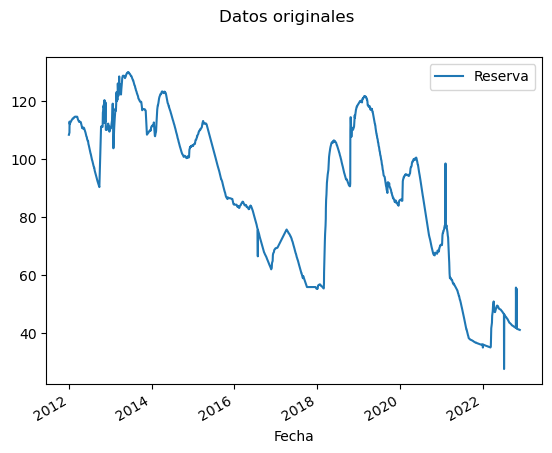

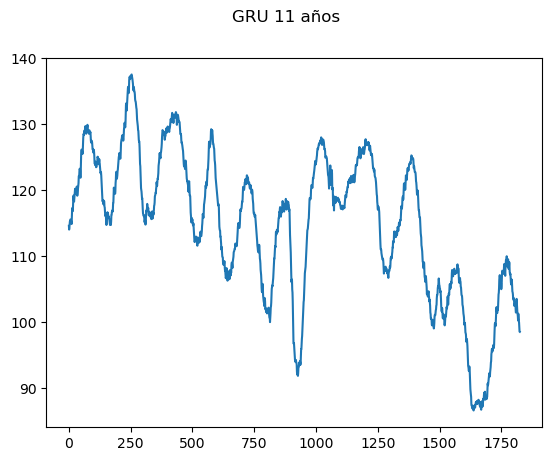

In [15]:
dataset[["Reserva"]].plot()
plt.suptitle('Datos originales')
plt.show()
plt.plot(trainPredict)
plt.suptitle('GRU 11 años')
plt.show()

In [16]:
mse = mean_squared_error(np.ravel(dataset[["Reserva"]].values[0:len(trainPredict)]), trainPredict)
mape = mean_absolute_percentage_error(np.ravel(dataset[["Reserva"]].values[0:len(trainPredict)]), trainPredict)
print("MSE: "+ str(mse) + " MAPE: "+ str(mape))

MSE: 1062.9509269335438 MAPE: 43.878246418757996


Ya que la funcion anterior para medir precisión no me vale (por algún motivo) vamos a hacer otra:

In [11]:
def medirPrecision3(model, dataX, dataY):
    model.eval()
    train_predict = model(dataX)
    
    data_predict = train_predict.data.cpu().numpy()
    train_predict_new = np.zeros(shape=(len(train_predict), 3))
    train_predict_new[:,0] = data_predict[:,0]
    trainPredict = sc.inverse_transform(train_predict_new )[:,0]
    
    dataset[["Reserva"]].plot()
    plt.suptitle('Datos originales')
    plt.show()
    plt.plot(trainPredict)
    plt.suptitle('GRU 11 años')
    plt.show()
    
    mse = mean_squared_error(np.ravel(dataset[["Reserva"]].values[0:len(trainPredict)]), trainPredict)
    mape = mean_absolute_percentage_error(np.ravel(dataset[["Reserva"]].values[0:len(trainPredict)]), trainPredict)
    print("MSE: "+ str(mse) + " MAPE: "+ str(mape))
    
    return mape

No tiene pinta de que así vaya a funcionar la cosa, al menos rápidamente. Vamos a probar si el problema viene de la función de pérdida

In [12]:
def entrenarGRU_v2(training_set, train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes):

  training_data = sc.fit_transform(training_set)

  x, y = sliding_windows(training_data, seq_length)

  train_size = int(len(y) * train_percentage)
  test_size = len(y) - train_size

  dataX = torch.Tensor(np.array(x))
  dataY = torch.Tensor(np.array(y))

  trainX = torch.Tensor(np.array(x[0:train_size]))
  trainY = torch.Tensor(np.array(y[0:train_size]))

  testX = torch.Tensor(np.array(x[train_size:len(x)]))
  testY = torch.Tensor(np.array(y[train_size:len(y)]))

  gru = GRU(num_classes, input_size, hidden_size, num_layers, seq_length)

  criterion = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(gru.parameters(), lr=learning_rate)

  # Lo siguiente es solo para guardar la curva de eficiencia
  eficiencia = []

  # Train the model
  pbar = tqdm(range(num_epochs))
  for epoch in pbar:
      outputs = gru(trainX)
      optimizer.zero_grad()
      
      # obtain the loss function
      loss = criterion(outputs, trainY)
      
      loss.backward()
      
      optimizer.step()

      eficiencia.append([epoch, loss.item()])
      if epoch % 100 == 0:
        pbar.set_description("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

  eficiencia = pd.DataFrame(eficiencia, columns=['Época', 'Pérdida'])
  return gru, dataX, dataY, eficiencia

  0%|          | 0/12000 [00:00<?, ?it/s]

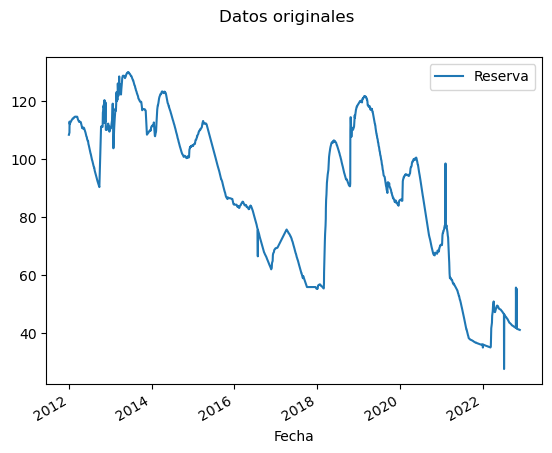

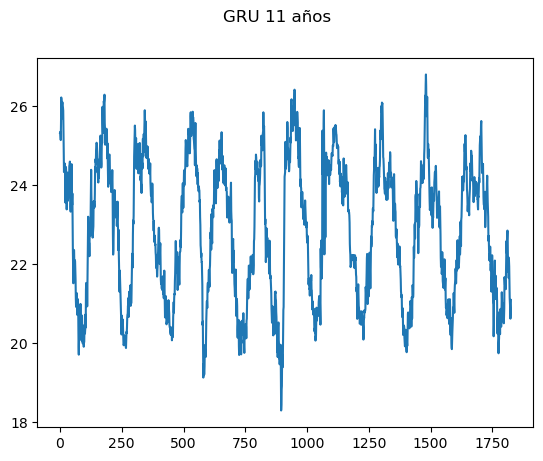

MSE: 4919.77587147625 MAPE: 70.34399780458403


70.34399780458403

In [19]:
num_epochs = 12000
learning_rate = 0.01

input_size = 3                  # 3 entradas en vez de 1
hidden_size = 4
num_layers = 1
num_classes = 3                 

train_percentage = ((7*100)/11)
seq_length = 21

gru, dataX, dataY, eficiencia = entrenarGRU_v2(dataset, train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision3(gru, dataX, dataY)

In [ ]:
num_epochs = 12000
learning_rate = 0.01

input_size = 3                  # 3 entradas en vez de 1
hidden_size = 4
num_layers = 1
num_classes = 3                 

train_percentage = ((7*100)/11)
seq_length = 21

train = 10
while train >=5:
    
    gru, dataX, dataY, eficiencia = entrenarGRU(dataset, train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
    train = medirPrecision3(gru, dataX, dataY)

In [ ]:
num_epochs = 12000
learning_rate = 0.01

input_size = 3                  # 3 entradas en vez de 1
hidden_size = 4
num_layers = 1
num_classes = 3                 

train_percentage = ((7*100)/11)
seq_length = 21

train = 10
while train >=5:
    
    gru, dataX, dataY, eficiencia = entrenarGRU_v2(dataset, train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
    train = medirPrecision3(gru, dataX, dataY)

In [ ]:
gru, dataX, dataY, eficiencia = entrenarGRU_v2(dataset, train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
gru.eval()
train_predict = gru(dataX)
    
data_predict = train_predict.data.cpu().numpy()
train_predict_new = np.zeros(shape=(len(train_predict), 3))
train_predict_new[:,0] = data_predict[:,0]
trainPredict = sc.inverse_transform(train_predict_new )[:,0]
    
dataset[["Reserva"]].plot()
plt.suptitle('Datos originales')
plt.show()
plt.plot(trainPredict)
plt.suptitle('GRU 11 años')
plt.show()
    
mse = mean_squared_error(np.ravel(dataset[["Reserva"]].values[0:len(trainPredict)]), trainPredict)
mape = mean_absolute_percentage_error(np.ravel(dataset[["Reserva"]].values[0:len(trainPredict)]), trainPredict)
print("MSE: "+ str(mse) + " MAPE: "+ str(mape))

Esto no tiene buena pinta, a ver si LSTM va mejor

  0%|          | 0/9000 [00:00<?, ?it/s]

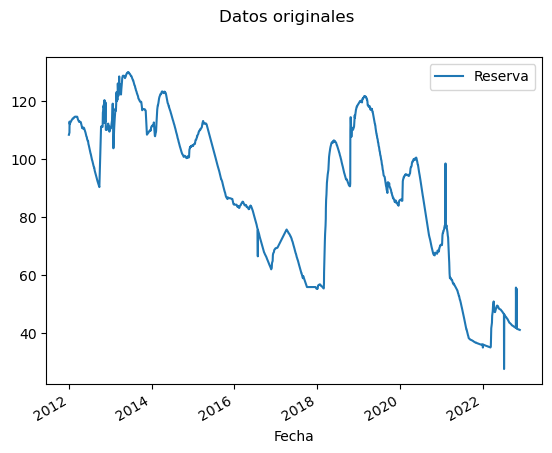

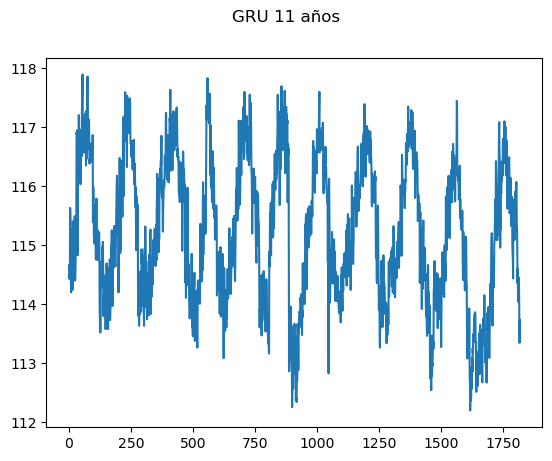

MSE: 1437.4431235924158 MAPE: 50.26035198722586


50.26035198722586

In [23]:
num_epochs = 9000
learning_rate = 0.01

input_size = 3
hidden_size = 6
num_layers = 1
num_classes = 3

train_percentage = ((7*100)/11)
seq_length = 28

lstm, dataX, dataY, eficiencia = entrenarLSTM(dataset, train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision3(lstm, dataX, dataY)

  0%|          | 0/9000 [00:00<?, ?it/s]

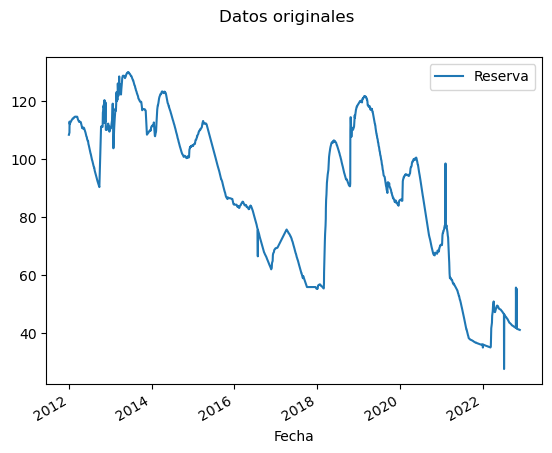

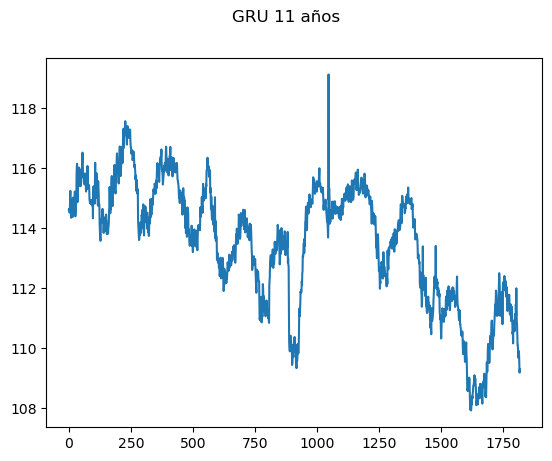

MSE: 1269.544381262275 MAPE: 47.23562954844892


In [27]:
num_epochs = 9000
learning_rate = 0.01

input_size = 3
hidden_size = 6
num_layers = 1
num_classes = 3

train_percentage = ((7*100)/11)
seq_length = 28

train = 51
while train >=50:
    
    lstm, dataX, dataY, eficiencia = entrenarLSTM(dataset, train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
    train = medirPrecision3(lstm, dataX, dataY)

Tiene pinta que estoy pillando alguna interferencia estadística
Vamos a poner de nuevo usando solo los datos de los pantanos

In [13]:
horceDF_2 = concatenarAnnos("GUADALHORCE")

In [32]:
num_epochs = 12000
learning_rate = 0.01

input_size = 1
hidden_size = 4
num_layers = 1
num_classes = 1                 

train_percentage = ((7*100)/11)
seq_length = 21

gru, dataX, dataY, eficiencia = entrenarGRU(horceDF_2, train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(gru, dataX, dataY)

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.731451392173767 MAPE: 0.6467901635915041


No tiene comparación, por curiosidad, vamos a probar a usar el v2

In [14]:
num_epochs = 12000
learning_rate = 0.01

input_size = 1
hidden_size = 4
num_layers = 1
num_classes = 1                 

train_percentage = ((7*100)/11)
seq_length = 21

gru, dataX, dataY, eficiencia = entrenarGRU_v2(horceDF_2, train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(gru, dataX, dataY)

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4509.61669921875 MAPE: 68.14404129981995


Pues son peores, una pena, pero voy a tener que utilizar solo los datos de los pantanos.
Estoy seguro pillando una fluctiación estadística

# Generación de modelos generalizada

Empezamos cargando todos los datasets

In [20]:
f = os.listdir("C:/Users\juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/")

f.remove("AEMET")
f.remove("codes.json")
f.remove("dataObtainer.py")
f.remove("descarga.json")
f.remove("estacionesAndaluzas.json")
f.remove("pantanoLocator.py")
f.remove("weatherDataObtainer.py")
f.remove("weatherDataStationObtainer.py")
f.remove("coordenadasPantanos.json") # Por motivos más que obvios
f.remove("stationAsigner.py")
f.remove("wikipediaExractor.py")
f.remove("asignaciones.json")
f.remove("dataFormatter.py")

datasets = {}
redes = {}

for name in f:
    datasets[name]= concatenarAnnos(name)
    
#num_epochs = 12000
#learning_rate = 0.01

#input_size = 1
#hidden_size = 4
#num_layers = 1
#num_classes = 1                 

#train_percentage = ((7*100)/11)
#seq_length = 21

#gru, dataX, dataY, eficiencia = entrenarGRU(datasets.get("GUADALHORCE"), train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
#mse = medirPrecision(gru, dataX, dataY)
#redes["GUADALHORCE"] = {"mse": mse, "model": gru}

Vale, ahora para asegurarnos lo mejor, vamos a hacer una función que entrene varias veces y se quede con lo mejor

In [12]:
def multipleEntrenamiento(dataset):
    mejor = 100
    modelo = None
    
    num_epochs = 12000
    learning_rate = 0.01

    input_size = 1
    hidden_size = 4
    num_layers = 1
    num_classes = 1                 

    train_percentage = ((7*100)/11)
    seq_length = 21

    pbar = tqdm(range(9))
    for i in pbar:
        pbar.set_description("Entrenamiento "+str(i))
        gru, dataX, dataY, eficiencia = entrenarGRU(dataset, train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
        mse = medirPrecision(gru, dataX, dataY)
        if mse < mejor:
            mejor = mse
            modelo = gru
        
    return mejor, modelo

Pues vamos a resetear la lista de modelos y a trabajar

In [13]:
redes = {}

In [27]:
pbart = tqdm(f,total=len(f))
for name in pbart:
    pbart.set_description("Dataset " + name)
    mse, gru = multipleEntrenamiento(datasets.get(name))
    redes[name] = {"mse": mse, "model": gru}

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.04427022486925125 MAPE: 1.1788773350417614


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.04293237254023552 MAPE: 0.9666924364864826


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.04311712831258774 MAPE: 0.8894662372767925


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.042600490152835846 MAPE: 0.9916571900248528


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.04251140356063843 MAPE: 0.8886647410690784


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.04221617802977562 MAPE: 0.9943605400621891


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.04199230670928955 MAPE: 0.8630892261862755


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.04296054318547249 MAPE: 0.9018163196742535


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.04342484101653099 MAPE: 0.9045549668371677


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11326.392578125 MAPE: 84.57701802253723


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11311.1767578125 MAPE: 70.26575803756714


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11326.62890625 MAPE: 84.23494100570679


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11322.3388671875 MAPE: 78.81463766098022


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11326.400390625 MAPE: 82.34794735908508


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11312.251953125 MAPE: 83.16846489906311


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11326.78515625 MAPE: 87.57551908493042


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11326.392578125 MAPE: 84.56867337226868


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11326.390625 MAPE: 84.5746397972107


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 310.5014953613281 MAPE: 70.27292847633362


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 288.13677978515625 MAPE: 51.570338010787964


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 398.28070068359375 MAPE: 95.62656283378601


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 265.4164733886719 MAPE: 43.34680438041687


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 326.164306640625 MAPE: 68.64901781082153


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 437.10784912109375 MAPE: 79.00316715240479


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 470.40869140625 MAPE: 92.93467402458191


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 259.3292236328125 MAPE: 49.7137188911438


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 298.5708923339844 MAPE: 49.95485842227936


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 31.593326568603516 MAPE: 1.1980703100562096


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 31.88495445251465 MAPE: 1.2364261783659458


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 31.34528160095215 MAPE: 1.1872130446135998


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 31.290342330932617 MAPE: 1.2255756184458733


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 31.562467575073242 MAPE: 1.1437770910561085


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 31.329978942871094 MAPE: 1.2225447222590446


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 31.372222900390625 MAPE: 1.23536828905344


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 31.725637435913086 MAPE: 1.1651765555143356


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 31.117769241333008 MAPE: 1.1813306249678135


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.201437473297119 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.145155429840088 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.103882312774658 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.101146697998047 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.115874290466309 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.130527496337891 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.111238479614258 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.092185020446777 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.129343032836914 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.541264057159424 MAPE: 1.1150439269840717


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.482053279876709 MAPE: 0.7624134887009859


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.430813789367676 MAPE: 0.7408884819597006


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.4921674728393555 MAPE: 1.189407054334879


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.399324893951416 MAPE: 0.7735918741673231


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.387660503387451 MAPE: 0.7772741839289665


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 7.367275238037109 MAPE: 2.403293363749981


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.477073669433594 MAPE: 0.7620635442435741


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.3859429359436035 MAPE: 0.7494174409657717


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 48.96565246582031 MAPE: 2.1326718851923943


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 51.1306037902832 MAPE: 2.5041697546839714


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 49.277095794677734 MAPE: 2.1454334259033203


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 49.578250885009766 MAPE: 2.1399762481451035


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 48.98760223388672 MAPE: 2.10610069334507


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 48.8829460144043 MAPE: 2.233985811471939


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 49.900325775146484 MAPE: 2.7837755158543587


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 48.36601638793945 MAPE: 2.209288626909256


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 48.90874099731445 MAPE: 2.1576572209596634


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.90518856048584 MAPE: 1.2399707920849323


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.451231956481934 MAPE: 1.1523672379553318


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.635133743286133 MAPE: 1.1600750498473644


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.765273094177246 MAPE: 1.1883827857673168


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.836359977722168 MAPE: 1.148098148405552


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.63950252532959 MAPE: 1.1272258125245571


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.919520378112793 MAPE: 1.165956910699606


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 17.851533889770508 MAPE: 2.0682012662291527


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.642522811889648 MAPE: 1.1575529351830482


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.50666332244873 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.381611824035645 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.307679176330566 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 9.967022895812988 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.314515113830566 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.401460647583008 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.286227226257324 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.514049530029297 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.444677352905273 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 491.7420654296875 MAPE: 2.356511726975441


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 491.138671875 MAPE: 2.3370983079075813


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 491.3533020019531 MAPE: 2.320832386612892


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 491.648193359375 MAPE: 2.205006219446659


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 490.9158630371094 MAPE: 2.4680569767951965


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 490.7904052734375 MAPE: 2.434643916785717


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 491.0188293457031 MAPE: 2.1061623468995094


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 490.3272399902344 MAPE: 2.654195949435234


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 488.5032043457031 MAPE: 3.1325671821832657


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.155242681503296 MAPE: 0.7561464793980122


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.1329796314239502 MAPE: 0.6703989114612341


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2086790800094604 MAPE: 0.709476787596941


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.1499789953231812 MAPE: 0.7034939248114824


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.1268502473831177 MAPE: 0.6645905785262585


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.139875888824463 MAPE: 0.6762031000107527


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.1817182302474976 MAPE: 0.7182963658124208


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.163509488105774 MAPE: 0.7154949940741062


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.1878269910812378 MAPE: 0.7144474424421787


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.8445470333099365 MAPE: 1.8292838707566261


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.8225934505462646 MAPE: 1.51648772880435


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.3501391410827637 MAPE: 1.449984684586525


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.961463451385498 MAPE: 1.4676978811621666


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.387423038482666 MAPE: 1.6757750883698463


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.8017456531524658 MAPE: 1.4131768606603146


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.1400046348571777 MAPE: 1.3405841775238514


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.1191611289978027 MAPE: 1.6987722367048264


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.176246404647827 MAPE: 1.8013505265116692


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0909268856048584 MAPE: 1.1765393428504467


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0234310626983643 MAPE: 0.9554834105074406


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.01969051361084 MAPE: 0.9722664020955563


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.2227983474731445 MAPE: 1.0142488405108452


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.038909435272217 MAPE: 0.9403933770954609


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0665385723114014 MAPE: 1.0086698457598686


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.3987650871276855 MAPE: 1.329774223268032


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0190978050231934 MAPE: 0.8910792879760265


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0373308658599854 MAPE: 1.0713511146605015


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0543767213821411 MAPE: 1.185530610382557


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0383683443069458 MAPE: 1.0399280115962029


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0548394918441772 MAPE: 1.1373963207006454


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.043918251991272 MAPE: 1.1619560420513153


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0757739543914795 MAPE: 1.9481049850583076


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0249465703964233 MAPE: 1.1661776341497898


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0777316093444824 MAPE: 1.1912709102034569


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.037078619003296 MAPE: 1.227488461881876


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0538913011550903 MAPE: 1.0738102719187737


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 7.005062580108643 MAPE: 3.243851289153099


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.965246200561523 MAPE: 3.1529199331998825


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.6783270835876465 MAPE: 2.8977038338780403


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 7.150431156158447 MAPE: 3.1838100403547287


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.682530879974365 MAPE: 2.7997368946671486


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 7.692230224609375 MAPE: 6.663911044597626


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.9901652336120605 MAPE: 3.020779602229595


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 7.069164752960205 MAPE: 3.609907627105713


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 7.92551851272583 MAPE: 5.52385076880455


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 147.5678253173828 MAPE: 50.72493553161621


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 119.61659240722656 MAPE: 47.59242236614227


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 135.76626586914062 MAPE: 42.830491065979004


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 125.78739166259766 MAPE: 48.25868308544159


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 152.9184112548828 MAPE: 49.095991253852844


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 133.13784790039062 MAPE: 47.69886136054993


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 112.86581420898438 MAPE: 41.49329960346222


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 118.16676330566406 MAPE: 43.03397834300995


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 173.015869140625 MAPE: 55.944013595581055


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.158129334449768 MAPE: 1.0846604593098164


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.9690480828285217 MAPE: 1.0497421026229858


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2678312063217163 MAPE: 1.174956001341343


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.9707993865013123 MAPE: 1.2520208023488522


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.4009112119674683 MAPE: 1.4117644168436527


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.1384053230285645 MAPE: 4.1425637900829315


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.9743946194648743 MAPE: 1.0506439954042435


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.010870099067688 MAPE: 1.0749735869467258


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.1969690322875977 MAPE: 1.0605978779494762


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.22528772056102753 MAPE: 1.077826600521803


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.25777947902679443 MAPE: 1.3988884165883064


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.23634552955627441 MAPE: 0.9109487757086754


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.22082440555095673 MAPE: 0.9455809369683266


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.22181643545627594 MAPE: 0.9094420820474625


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.22112254798412323 MAPE: 0.9120170027017593


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.25308799743652344 MAPE: 1.0421372950077057


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.2357666790485382 MAPE: 1.0035140439867973


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.21230289340019226 MAPE: 0.8537502028048038


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.5620394945144653 MAPE: 1.399193610996008


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.4795079231262207 MAPE: 1.4198299497365952


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.489609956741333 MAPE: 1.2832214124500751


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.6711230278015137 MAPE: 1.9137507304549217


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.4734958410263062 MAPE: 1.3330177403986454


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.4964704513549805 MAPE: 1.275645662099123


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.462917447090149 MAPE: 1.2895206920802593


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.5181440114974976 MAPE: 1.3354669325053692


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.5023900270462036 MAPE: 1.3093916699290276


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.9163116812705994 MAPE: 1.24749056994915


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2337892055511475 MAPE: 1.8775586038827896


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.9697563648223877 MAPE: 1.2439337559044361


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0249824523925781 MAPE: 1.272415742278099


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0035839080810547 MAPE: 1.294182427227497


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.007599115371704 MAPE: 1.3105470687150955


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.9220840334892273 MAPE: 1.5015286393463612


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.9998432993888855 MAPE: 1.29450224339962


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0304163694381714 MAPE: 1.2899029068648815


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.173974514007568 MAPE: 9.47980135679245


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.499809741973877 MAPE: 14.120136201381683


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.017936706542969 MAPE: 10.243415087461472


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 9.98477554321289 MAPE: 13.707117736339569


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.639884948730469 MAPE: 12.207059562206268


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.2735466957092285 MAPE: 10.034556686878204


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.223258018493652 MAPE: 10.293710231781006


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.15349817276001 MAPE: 12.378010898828506


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.571930885314941 MAPE: 11.98674961924553


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.40662872791290283 MAPE: 1.8303608521819115


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.4005796015262604 MAPE: 1.2583108618855476


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.4029340445995331 MAPE: 1.3592739589512348


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.39775604009628296 MAPE: 1.2909657321870327


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.400255024433136 MAPE: 1.296441350132227


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.4250468909740448 MAPE: 1.515145692974329


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.4024122953414917 MAPE: 1.3288307003676891


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.39900732040405273 MAPE: 1.267207507044077


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.40198466181755066 MAPE: 1.306627131998539


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.5823380947113037 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.6136221885681152 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.6132547855377197 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.8176546096801758 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.635629653930664 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.5500949621200562 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.5175725221633911 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.6090080738067627 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.7907518148422241 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0615882873535156 MAPE: 2.152808755636215


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.059802770614624 MAPE: 2.1284714341163635


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0588843822479248 MAPE: 2.2074084728956223


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0620182752609253 MAPE: 1.6338208690285683


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0654453039169312 MAPE: 4.758669063448906


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0561683177947998 MAPE: 2.2358298301696777


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0612916946411133 MAPE: 2.2006165236234665


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0584988594055176 MAPE: 2.264074608683586


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0615915060043335 MAPE: 2.176932245492935


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.105252265930176 MAPE: 2.9864203184843063


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.168044090270996 MAPE: 3.2647300511598587


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.523645401000977 MAPE: 4.451287165284157


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.193045616149902 MAPE: 4.589762166142464


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.272187232971191 MAPE: 2.9758473858237267


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.09357738494873 MAPE: 2.702089212834835


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.07848834991455 MAPE: 2.6906058192253113


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.21133804321289 MAPE: 2.7645504102110863


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.04636287689209 MAPE: 2.6934821158647537


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 20.47307014465332 MAPE: 1.8144534900784492


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 18.981966018676758 MAPE: 2.3458700627088547


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 20.545181274414062 MAPE: 1.8676016479730606


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 20.611833572387695 MAPE: 1.9248828291893005


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 20.92820930480957 MAPE: 1.8444940447807312


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 20.300962448120117 MAPE: 1.8571695312857628


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 19.04191780090332 MAPE: 1.8700005486607552


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 20.626609802246094 MAPE: 1.8304595723748207


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 14.789996147155762 MAPE: 1.955450139939785


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.2754027843475342 MAPE: 0.8036493323743343


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.35506656765937805 MAPE: 0.7345784455537796


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3473071753978729 MAPE: 0.7572731003165245


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.35190874338150024 MAPE: 0.7845217362046242


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3466193974018097 MAPE: 0.7443687412887812


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3376070261001587 MAPE: 0.7503856439143419


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3443126082420349 MAPE: 0.7446118164807558


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3474530875682831 MAPE: 0.7633331697434187


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3432610034942627 MAPE: 0.7383371237665415


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.2329571396112442 MAPE: 0.6929392460733652


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.26283055543899536 MAPE: 0.7338383700698614


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.22508573532104492 MAPE: 0.6291842088103294


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.2901688814163208 MAPE: 0.7847326807677746


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.2346082180738449 MAPE: 0.7166183087974787


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.2481897920370102 MAPE: 0.757978530600667


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.21737562119960785 MAPE: 0.6301394663751125


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.23937208950519562 MAPE: 0.7156646344810724


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.25684234499931335 MAPE: 0.7578160613775253


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 18.91660499572754 MAPE: 2.082786336541176


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 18.781702041625977 MAPE: 1.9125670194625854


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 18.90363121032715 MAPE: 1.854214258491993


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 37.93191909790039 MAPE: 12.858264148235321


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 19.066240310668945 MAPE: 1.8999530002474785


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 19.72124481201172 MAPE: 1.9558515399694443


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 19.588666915893555 MAPE: 2.1263588219881058


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 18.624530792236328 MAPE: 2.066587097942829


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 18.67206573486328 MAPE: 1.985781267285347


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 83.24301147460938 MAPE: 2.894365042448044


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 78.22787475585938 MAPE: 2.6611384004354477


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 83.17655181884766 MAPE: 2.83502247184515


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 80.43114471435547 MAPE: 2.662689983844757


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 87.37178039550781 MAPE: 3.1745731830596924


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 85.20304870605469 MAPE: 3.3400189131498337


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 80.55549621582031 MAPE: 2.8169209137558937


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 79.64795684814453 MAPE: 2.6533005759119987


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 80.90010833740234 MAPE: 2.6877060532569885


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 148.30313110351562 MAPE: 1.5356741845607758


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 145.60931396484375 MAPE: 1.4101159758865833


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 152.5411376953125 MAPE: 1.660042442381382


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 152.96139526367188 MAPE: 1.6194520518183708


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 155.09327697753906 MAPE: 1.7205161973834038


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 144.02716064453125 MAPE: 1.3578418642282486


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 152.47340393066406 MAPE: 1.6240909695625305


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 152.1180877685547 MAPE: 1.6500182449817657


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 159.0471954345703 MAPE: 2.065087854862213


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 33.89735412597656 MAPE: 1.5767315402626991


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 34.14833068847656 MAPE: 1.7110487446188927


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 33.82411575317383 MAPE: 1.7966249957680702


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 33.8658561706543 MAPE: 1.6858408227562904


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 34.13127899169922 MAPE: 1.8986284732818604


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 33.939517974853516 MAPE: 1.742718182504177


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 33.95056915283203 MAPE: 1.7692824825644493


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 33.99349594116211 MAPE: 1.7073813825845718


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 34.096778869628906 MAPE: 1.6852868720889091


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.639518141746521 MAPE: 0.5668272264301777


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.558618426322937 MAPE: 0.550860958173871


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.6361652612686157 MAPE: 0.5507912952452898


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.5980684757232666 MAPE: 0.5528544541448355


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.597744107246399 MAPE: 0.5491530522704124


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.7166842222213745 MAPE: 0.6339419167488813


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.5211074352264404 MAPE: 0.5562991369515657


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.684000849723816 MAPE: 0.8023595437407494


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.5398094654083252 MAPE: 0.5471878685057163


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.9772902727127075 MAPE: 0.4652751609683037


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.7113903760910034 MAPE: 0.5082436837255955


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.093785524368286 MAPE: 0.48779244534671307


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.740339994430542 MAPE: 0.5998273380100727


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0477404594421387 MAPE: 0.44999062083661556


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.988752007484436 MAPE: 0.45724627561867237


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0243093967437744 MAPE: 0.4418722353875637


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.9496278762817383 MAPE: 0.4409732297062874


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.9051543474197388 MAPE: 0.42442516423761845


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 18.498056411743164 MAPE: 1.0445846244692802


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 18.58561897277832 MAPE: 0.8991146460175514


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 17.824024200439453 MAPE: 0.8623923175036907


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 17.882156372070312 MAPE: 0.8572027087211609


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 17.93592643737793 MAPE: 0.8468532003462315


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 19.094013214111328 MAPE: 0.9221341460943222


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 18.05526351928711 MAPE: 0.8502804674208164


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 17.978256225585938 MAPE: 0.8869322016835213


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 18.530092239379883 MAPE: 0.8304724469780922


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.338374137878418 MAPE: 0.3351217368617654


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.7673227787017822 MAPE: 0.3912997432053089


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.9151554107666016 MAPE: 0.37869466468691826


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.863713026046753 MAPE: 0.3666385542601347


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.3276838064193726 MAPE: 0.34548351541161537


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.7135310173034668 MAPE: 0.3226031316444278


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.228088140487671 MAPE: 0.3338340437039733


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.1979484558105469 MAPE: 0.3118716413155198


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.186783790588379 MAPE: 0.3202134044840932


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.4798197746276855 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.481411457061768 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.479119300842285 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.483249187469482 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.479219436645508 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.480836391448975 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.480035305023193 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.4816131591796875 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.4792704582214355 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.363532781600952 MAPE: 3.5739272832870483


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.519294500350952 MAPE: 4.0492527186870575


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.2046780586242676 MAPE: 3.5150397568941116


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.4880385398864746 MAPE: 3.6457937210798264


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.415376901626587 MAPE: 3.5561319440603256


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.6414871215820312 MAPE: 3.6333560943603516


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.3106284141540527 MAPE: 3.613648936152458


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.3971362113952637 MAPE: 3.5706453025341034


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.3461928367614746 MAPE: 3.5844437777996063


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.91836166381836 MAPE: 1.03208739310503


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.958794593811035 MAPE: 0.9863846935331821


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.767885208129883 MAPE: 0.9700195863842964


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.187155723571777 MAPE: 1.3125386089086533


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.870641708374023 MAPE: 1.0102557018399239


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 14.238399505615234 MAPE: 1.6291333362460136


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 9.893410682678223 MAPE: 1.0525833815336227


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.864246368408203 MAPE: 1.0600822977721691


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.976800918579102 MAPE: 1.1740993708372116


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 67.45625305175781 MAPE: 0.8669087663292885


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 67.31657409667969 MAPE: 0.8599275723099709


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 70.000732421875 MAPE: 0.921973492950201


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 69.6262435913086 MAPE: 0.9294518269598484


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 67.5657958984375 MAPE: 0.8550356142222881


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 66.56150817871094 MAPE: 0.8454768918454647


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 68.47811126708984 MAPE: 0.8914990350604057


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 149.40615844726562 MAPE: 2.3827798664569855


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 67.8843994140625 MAPE: 0.8751343004405499


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 139.96742248535156 MAPE: 19.55815702676773


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 160.56541442871094 MAPE: 15.500327944755554


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 103.67548370361328 MAPE: 12.903603911399841


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 92.6189193725586 MAPE: 13.102184236049652


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 98.36808776855469 MAPE: 14.42299485206604


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 90.1943359375 MAPE: 12.562517821788788


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 101.84334564208984 MAPE: 13.12883049249649


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 90.46768951416016 MAPE: 11.937065422534943


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 151.04217529296875 MAPE: 15.791966021060944


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.66004753112793 MAPE: 1.0046618059277534


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.149380207061768 MAPE: 1.2331049889326096


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.296082973480225 MAPE: 2.393692173063755


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.278226375579834 MAPE: 1.3654130510985851


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.080742359161377 MAPE: 1.1268137954175472


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.781080722808838 MAPE: 1.051176991313696


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.674562454223633 MAPE: 1.1407413519918919


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.9301605224609375 MAPE: 1.143759023398161


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.859805583953857 MAPE: 1.1296674609184265


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 63.071266174316406 MAPE: 0.9182379581034184


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 66.0523452758789 MAPE: 1.528069842606783


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 62.408287048339844 MAPE: 0.8738654665648937


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 62.94154739379883 MAPE: 0.8954078890383244


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 62.38941192626953 MAPE: 0.8987060748040676


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 62.80451583862305 MAPE: 0.9070134721696377


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 62.977996826171875 MAPE: 0.8990981616079807


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 62.65771484375 MAPE: 0.8977371267974377


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 62.560585021972656 MAPE: 0.873919203877449


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 14.061970710754395 MAPE: 1.8688453361392021


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 18.372682571411133 MAPE: 3.767622634768486


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 14.380833625793457 MAPE: 2.042928524315357


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 14.61386489868164 MAPE: 1.7474925145506859


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 14.560419082641602 MAPE: 2.1033599972724915


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.74935245513916 MAPE: 3.9155688136816025


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 14.578272819519043 MAPE: 2.497672475874424


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.497588157653809 MAPE: 3.7005189806222916


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.4092745780944824 MAPE: 1.9164403900504112


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 16.91465950012207 MAPE: 0.6183163728564978


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 17.667627334594727 MAPE: 0.6160585675388575


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 49.45683670043945 MAPE: 1.220864336937666


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 17.805362701416016 MAPE: 0.6349460687488317


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 144.99024963378906 MAPE: 2.77088675647974


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 17.82399559020996 MAPE: 0.6545205134898424


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 17.12775993347168 MAPE: 0.647811172530055


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 18.13239097595215 MAPE: 0.6750267930328846


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 17.22552490234375 MAPE: 0.6106201559305191


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 19.369964599609375 MAPE: 1.1251365765929222


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 25.4351806640625 MAPE: 1.7614705488085747


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 19.30495262145996 MAPE: 1.3328729197382927


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 20.242761611938477 MAPE: 1.1364814825356007


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 31.924396514892578 MAPE: 1.4100567437708378


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 19.57930564880371 MAPE: 1.2749680317938328


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 19.923072814941406 MAPE: 1.1556087993085384


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 21.29853630065918 MAPE: 1.3132897205650806


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 22.34589195251465 MAPE: 1.5829924494028091


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.15058422088623 MAPE: 1.0412884876132011


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.999650001525879 MAPE: 0.907577108591795


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.132113456726074 MAPE: 1.1398029513657093


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.148295402526855 MAPE: 1.0936206206679344


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.00783920288086 MAPE: 0.9447939693927765


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.998682022094727 MAPE: 0.8786126971244812


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.160978317260742 MAPE: 1.1157131753861904


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.150505065917969 MAPE: 1.067837979644537


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.093235969543457 MAPE: 1.0520164854824543


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.004171371459961 MAPE: 0.948016345500946


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0076518058776855 MAPE: 0.9291420690715313


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.9985414743423462 MAPE: 0.9818069636821747


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0096843242645264 MAPE: 0.9581379592418671


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.006711959838867 MAPE: 1.0480370372533798


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0068743228912354 MAPE: 0.9915821254253387


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0117290019989014 MAPE: 1.0087600909173489


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0032670497894287 MAPE: 0.9802146814763546


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0062878131866455 MAPE: 0.9432786144316196


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.4497311115264893 MAPE: 1.1999818496406078


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.61741304397583 MAPE: 1.0622191242873669


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.1327266693115234 MAPE: 1.811862550675869


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.7658486366271973 MAPE: 1.2213182635605335


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.814323663711548 MAPE: 1.2546490877866745


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.6363561153411865 MAPE: 1.1033816263079643


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.8686537742614746 MAPE: 1.3428445905447006


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.796211004257202 MAPE: 1.5046747401356697


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.6563920974731445 MAPE: 1.1447327211499214


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 9.977790832519531 MAPE: 2.3843914270401


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.809917449951172 MAPE: 2.1845443174242973


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.569306373596191 MAPE: 2.4877024814486504


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 9.677221298217773 MAPE: 2.153257839381695


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.471013069152832 MAPE: 2.903608977794647


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.62527847290039 MAPE: 2.898198924958706


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.092510223388672 MAPE: 2.236355282366276


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.845611572265625 MAPE: 2.3003989830613136


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 9.224030494689941 MAPE: 2.323954924941063


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.8555534482002258 MAPE: 5.176707357168198


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.7976282835006714 MAPE: 5.292325094342232


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.9406747221946716 MAPE: 6.090542301535606


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.7860528230667114 MAPE: 5.291425809264183


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.9345487356185913 MAPE: 6.327786296606064


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.8789893388748169 MAPE: 6.266997754573822


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.7535860538482666 MAPE: 5.330446362495422


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.9151306748390198 MAPE: 7.311731576919556


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.8436672687530518 MAPE: 5.6320637464523315


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 28.565858840942383 MAPE: 6.740059703588486


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 26.317575454711914 MAPE: 9.329184144735336


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 22.436845779418945 MAPE: 6.7258320748806


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 22.345947265625 MAPE: 5.681309849023819


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 23.231822967529297 MAPE: 4.891210049390793


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 23.17617416381836 MAPE: 4.969418048858643


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 23.214941024780273 MAPE: 4.824353009462357


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 23.22747802734375 MAPE: 4.9890026450157166


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 23.2687931060791 MAPE: 6.127208843827248


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 20.361562728881836 MAPE: 1.3859815895557404


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 20.40069580078125 MAPE: 1.3842220418155193


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 20.385032653808594 MAPE: 1.385620143264532


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 20.517555236816406 MAPE: 1.3593753799796104


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 20.503005981445312 MAPE: 1.3993298634886742


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 20.499279022216797 MAPE: 1.3654744252562523


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 20.56049919128418 MAPE: 1.3487373478710651


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 20.50196647644043 MAPE: 1.3782985508441925


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 20.580047607421875 MAPE: 1.3561222702264786


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 12.303159713745117 MAPE: 0.5594437476247549


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.992865562438965 MAPE: 0.5040943156927824


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 12.410313606262207 MAPE: 0.6434404756873846


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.778948783874512 MAPE: 0.472067017108202


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 12.412155151367188 MAPE: 0.5173168145120144


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 19.1705379486084 MAPE: 1.039149146527052


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 12.594656944274902 MAPE: 0.5269831977784634


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 12.329567909240723 MAPE: 0.5451626610010862


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 12.335999488830566 MAPE: 0.5064662545919418


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 10.280731201171875 MAPE: 24.80592578649521


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 18.5768985748291 MAPE: 23.630855977535248


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 22.15812873840332 MAPE: 23.66018295288086


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 17.1063232421875 MAPE: 26.298800110816956


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 9.018392562866211 MAPE: 22.744807600975037


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 22.971107482910156 MAPE: 23.467978835105896


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 45.50845718383789 MAPE: 28.87156903743744


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 9.911020278930664 MAPE: 24.960938096046448


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 21.488149642944336 MAPE: 25.56784152984619


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.1298339366912842 MAPE: 2.491896227002144


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.9264808297157288 MAPE: 1.9657101482152939


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.3721073865890503 MAPE: 2.5282269343733788


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.8911388516426086 MAPE: 1.3471378944814205


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.18093740940094 MAPE: 3.238334506750107


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.9955654740333557 MAPE: 1.6454534605145454


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2726874351501465 MAPE: 2.574373781681061


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.961854100227356 MAPE: 1.8234770745038986


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.6274622678756714 MAPE: 2.2406676784157753


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.847191095352173 MAPE: 0.9622892364859581


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.5435068607330322 MAPE: 1.0216837748885155


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.763406753540039 MAPE: 0.6293510086834431


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.7693613767623901 MAPE: 0.6342689041048288


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.811031699180603 MAPE: 0.6634597666561604


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.7455997467041016 MAPE: 0.636353949084878


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.9183411598205566 MAPE: 0.6901365239173174


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.8361728191375732 MAPE: 0.6568355020135641


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.7347097396850586 MAPE: 0.6175613962113857


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.010516289621591568 MAPE: 0.45630610547959805


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.010482605546712875 MAPE: 0.457140663638711


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.010598416440188885 MAPE: 0.46010888181626797


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.010435069911181927 MAPE: 0.45654396526515484


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.0105141531676054 MAPE: 0.45880135148763657


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.01058832835406065 MAPE: 0.45450422912836075


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.009785810485482216 MAPE: 0.4593251273036003


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.010671017691493034 MAPE: 0.45546567998826504


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.010012802667915821 MAPE: 0.4582401365041733


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.984987735748291 MAPE: 2.4719951674342155


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.214680552482605 MAPE: 7.197859138250351


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.1440054327249527 MAPE: 1.2951772660017014


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.842385768890381 MAPE: 2.8309641405940056


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 7.560803413391113 MAPE: 3.3216677606105804


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.3533138036727905 MAPE: 5.385978519916534


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.75778865814209 MAPE: 2.670648507773876


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 7.944797992706299 MAPE: 3.3164318650960922


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 7.722609519958496 MAPE: 1.7764031887054443


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.382782220840454 MAPE: 0.7086080964654684


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.7754368185997009 MAPE: 1.3924583792686462


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.360994577407837 MAPE: 0.8078925311565399


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2971447706222534 MAPE: 0.801027100533247


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.3646928071975708 MAPE: 0.7301319856196642


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.3491123914718628 MAPE: 0.8495001122355461


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.3470711708068848 MAPE: 0.8144194260239601


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.313976764678955 MAPE: 0.7557107135653496


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.3148528337478638 MAPE: 0.8291738107800484


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2007793188095093 MAPE: 0.389767880551517


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.3476228713989258 MAPE: 0.47253496013581753


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.231457233428955 MAPE: 0.4167127422988415


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2809115648269653 MAPE: 0.448058545589447


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.353519082069397 MAPE: 0.4803346935659647


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2573904991149902 MAPE: 0.4953427240252495


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2370669841766357 MAPE: 0.4232505802065134


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.3715895414352417 MAPE: 0.5586810410022736


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.189182996749878 MAPE: 0.38981407415121794


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.7296624183654785 MAPE: 1.017632707953453


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.946601867675781 MAPE: 0.9561531245708466


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.752080917358398 MAPE: 1.001499593257904


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.434922218322754 MAPE: 1.0408909060060978


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.327869415283203 MAPE: 2.2808223962783813


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.711456775665283 MAPE: 0.9520513005554676


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.502880096435547 MAPE: 1.058561634272337


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.509620189666748 MAPE: 0.9424132294952869


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.601353645324707 MAPE: 1.0326425544917583


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2169435024261475 MAPE: 0.8248960599303246


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2118949890136719 MAPE: 0.8309005759656429


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2370092868804932 MAPE: 0.8500977419316769


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2069871425628662 MAPE: 0.8271396160125732


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2529287338256836 MAPE: 0.833363551646471


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2283589839935303 MAPE: 0.9768807329237461


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2684764862060547 MAPE: 0.8660320192575455


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.1813814640045166 MAPE: 0.755525752902031


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2352886199951172 MAPE: 0.8697967976331711


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.8425588607788086 MAPE: 1.838129572570324


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.645512342453003 MAPE: 1.6778204590082169


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.788820266723633 MAPE: 1.8117660656571388


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.3131775856018066 MAPE: 1.289711520075798


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.669734477996826 MAPE: 1.699758693575859


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.719085454940796 MAPE: 1.7318354919552803


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.691882610321045 MAPE: 1.7058927565813065


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.755589008331299 MAPE: 1.7477545887231827


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.651785373687744 MAPE: 1.6448285430669785


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3589690923690796 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3327615559101105 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.37079495191574097 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3643007278442383 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3849037289619446 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.5763432383537292 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.42818012833595276 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.36578986048698425 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.38301703333854675 MAPE: inf


C:\Users\juanm\AppData\Local\Temp\ipykernel_23872\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2510716915130615 MAPE: 3.5740025341510773


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.5057786703109741 MAPE: 4.850239306688309


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.3439011573791504 MAPE: 5.220883339643478


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.213210940361023 MAPE: 5.226645991206169


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2014638185501099 MAPE: 3.5420771688222885


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2179787158966064 MAPE: 3.668145462870598


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.3138129711151123 MAPE: 4.956114292144775


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.20986807346344 MAPE: 3.8785461336374283


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.1301957368850708 MAPE: 3.2628539949655533


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 23.711687088012695 MAPE: 0.47375475987792015


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 22.925134658813477 MAPE: 0.44494508765637875


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 24.164588928222656 MAPE: 0.6174171809107065


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 23.143497467041016 MAPE: 0.49362978897988796


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 23.50822639465332 MAPE: 0.4604759160429239


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 23.33993911743164 MAPE: 0.43205125257372856


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 25.795791625976562 MAPE: 0.7717024069279432


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 22.75116539001465 MAPE: 0.4993641749024391


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 22.739625930786133 MAPE: 0.4575771279633045


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.938464164733887 MAPE: 1.6087664291262627


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 12.14076042175293 MAPE: 2.1458029747009277


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 13.60244083404541 MAPE: 5.431940034031868


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 12.972684860229492 MAPE: 1.614159345626831


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.009243965148926 MAPE: 1.7410166561603546


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 17.81070899963379 MAPE: 1.506761647760868


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.0036873817443848 MAPE: 1.9327813759446144


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 12.20480728149414 MAPE: 1.8054727464914322


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.986081600189209 MAPE: 1.319124735891819


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.36451491713523865 MAPE: 0.29127621091902256


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.6334375739097595 MAPE: 0.5828392691910267


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.35872209072113037 MAPE: 0.2883581444621086


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.42290806770324707 MAPE: 0.37473957054317


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3984803557395935 MAPE: 0.37387607153505087


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.37278446555137634 MAPE: 0.31569369602948427


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.4008735120296478 MAPE: 0.29564136639237404


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3847694993019104 MAPE: 0.28787965420633554


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3588106036186218 MAPE: 0.32182466238737106


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.23548996448516846 MAPE: 3.170408681035042


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.1361083984375 MAPE: 3.727153316140175


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.51134729385376 MAPE: 3.231598436832428


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.157017230987549 MAPE: 6.042330712080002


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.6389312744140625 MAPE: 5.402685329318047


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.42978048324585 MAPE: 3.533019497990608


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.20994168519973755 MAPE: 2.7422290295362473


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.17536397278308868 MAPE: 3.7395909428596497


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.31736040115356445 MAPE: 4.351039603352547


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.835961818695068 MAPE: 1.0963709093630314


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.2451114654541016 MAPE: 0.45666787773370743


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.2323765754699707 MAPE: 0.44934339821338654


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.2209367752075195 MAPE: 0.4642054904252291


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.2687196731567383 MAPE: 0.4715492483228445


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.33923077583313 MAPE: 0.5213092546910048


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.2474563121795654 MAPE: 0.44579957611858845


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.2686710357666016 MAPE: 0.45600589364767075


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.2656733989715576 MAPE: 0.46954555436968803


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.6624886989593506 MAPE: 0.42556580156087875


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.5611772537231445 MAPE: 0.38989298045635223


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.709237813949585 MAPE: 0.42438129894435406


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.6028201580047607 MAPE: 0.41229985654354095


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.795288324356079 MAPE: 0.448733801022172


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.858969211578369 MAPE: 0.4471101798117161


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.674194812774658 MAPE: 0.42166891507804394


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.902503490447998 MAPE: 0.48187971115112305


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.268233776092529 MAPE: 0.8460204117000103


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.720144271850586 MAPE: 0.32793832942843437


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.6447434425354 MAPE: 0.33020623959600925


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.712080001831055 MAPE: 0.3459417261183262


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.669614791870117 MAPE: 0.3354823449626565


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.685313701629639 MAPE: 0.31701347324997187


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.747119903564453 MAPE: 0.38867343682795763


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.6874308586120605 MAPE: 0.41254530660808086


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.62733268737793 MAPE: 0.316257169470191


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.617957592010498 MAPE: 0.31874747946858406


In [38]:
for i in redes.keys():
    torch.save(redes.get(i).get("model"), "C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/"+i+".pt")

In [ ]:
for i in redes.keys():
    print(i)

Ahora vamos a cargar los modelos desde archivo

In [38]:
names = os.listdir("C:/Users\juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/")
for i in names:
    dir = "C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/"+i
    redes[i] = {torch.load(dir)}
    


In [15]:
for i in redes.keys():
    if redes[i] == {None}:
        print(i)

ALMODÃ“VAR.pt
ANDÃ‰VALO.pt
BORNOS.pt
CHANZA.pt
GUADALCACÃN.pt


Estos no se han guardado porque tienen un mse mayor a 100

mse1, gru1 = multipleEntrenamiento(datasets.get("ALMODÓVAR"))

mse2, gru2 = multipleEntrenamiento(datasets.get("ANDÉVALO"))

mse3, gru3 = multipleEntrenamiento(datasets.get("BORNOS"))

mse4, gru4 = multipleEntrenamiento(datasets.get("CHANZA"))

mse5, gru5 = multipleEntrenamiento(datasets.get("GUADALCACÍN"))

No haría nada

Veamos si LSTM funciona mejor en estos

In [55]:
num_epochs = 9000
learning_rate = 0.01
input_size = 1
hidden_size = 6
num_layers = 1
num_classes = 1
seq_length = 28
train_percentage = ((7*100)/11)

lstm, dataX, dataY, eficiencia = entrenarLSTM(datasets.get("ANDÉVALO"), train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(lstm, dataX, dataY)

  0%|          | 0/9000 [00:00<?, ?it/s]

MSE: 18959.57421875 MAPE: 269.3432807922363


18959.574

No, no mejora, y la verdad, ni idea de por qué, a ver en un plot

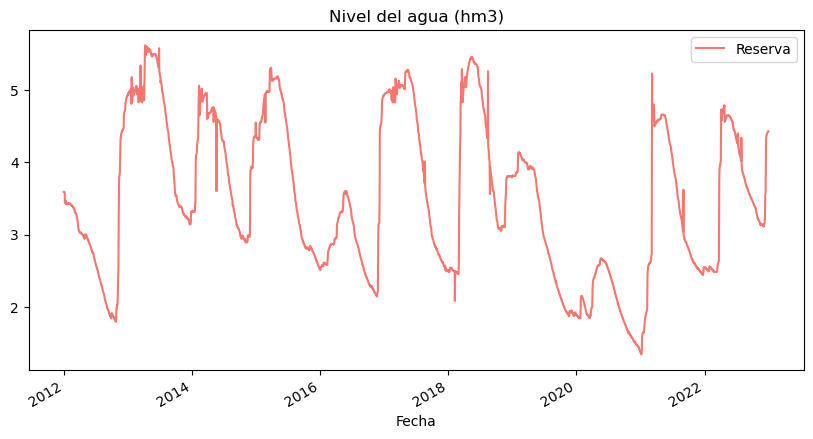

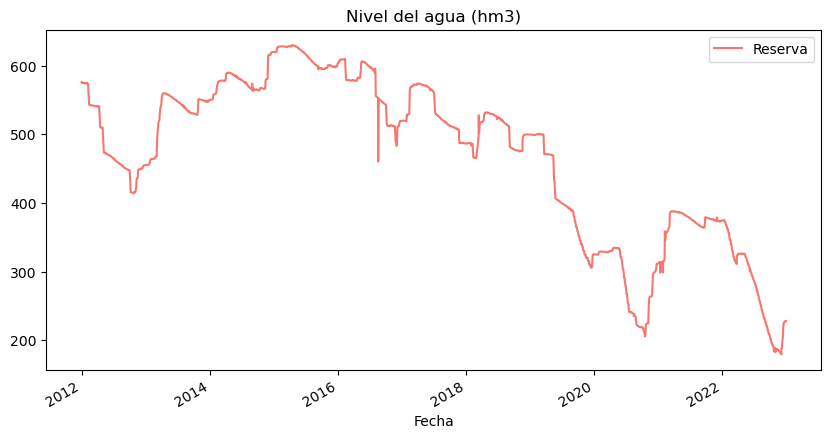

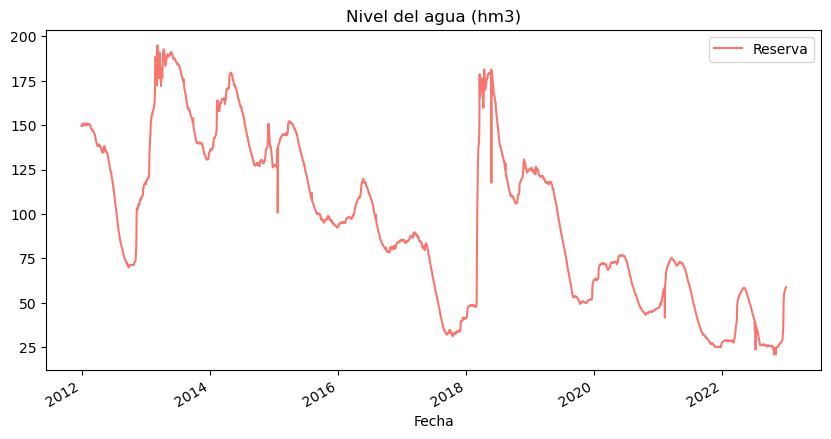

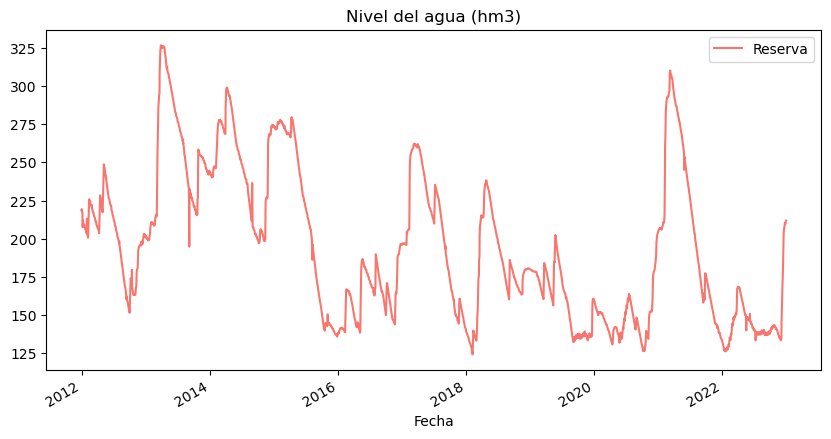

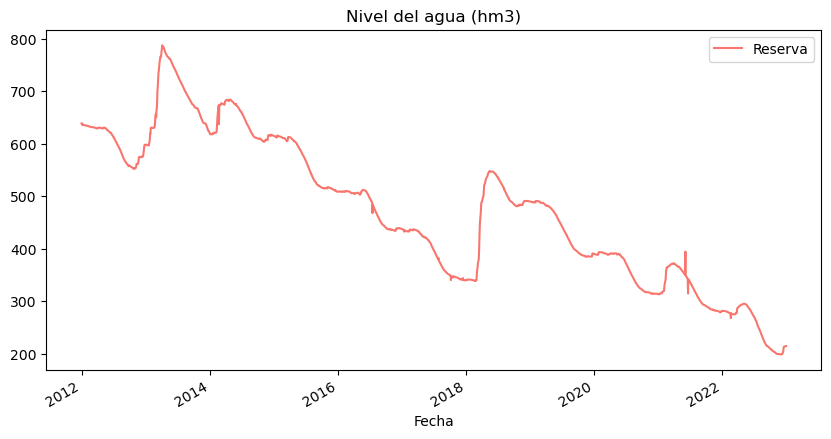

In [76]:
datasets.get("ALMODÓVAR").plot(style='-', figsize=(10,5), color=color_pal[0], title='Nivel del agua (hm3)')
plt.show()
datasets.get("ANDÉVALO").plot(style='-', figsize=(10,5), color=color_pal[0], title='Nivel del agua (hm3)')
plt.show()
datasets.get("BORNOS").plot(style='-', figsize=(10,5), color=color_pal[0], title='Nivel del agua (hm3)')
plt.show()
datasets.get("CHANZA").plot(style='-', figsize=(10,5), color=color_pal[0], title='Nivel del agua (hm3)')
plt.show()
datasets.get("GUADALCACÍN").plot(style='-', figsize=(10,5), color=color_pal[0], title='Nivel del agua (hm3)')
plt.show()

Claramente hay problemas con los datos, OTRA vez (aunque el último bien podría ir bien lpm)

Ahora que está arreglado, funciona mejor?

In [77]:
num_epochs = 12000
learning_rate = 0.01

input_size = 1
hidden_size = 4
num_layers = 1
num_classes = 1                 

train_percentage = ((7*100)/11)
seq_length = 21

gru, dataX, dataY, eficiencia = entrenarGRU(datasets.get("ALMODÓVAR"), train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(gru, dataX, dataY)

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.008988944813609123 MAPE: 1.0665606707334518


0.008988945

Pues si que va mejor si, la virgen

In [78]:
mse1, gru1 = multipleEntrenamiento(datasets.get("ALMODÓVAR"))

mse2, gru2 = multipleEntrenamiento(datasets.get("ANDÉVALO"))

mse3, gru3 = multipleEntrenamiento(datasets.get("BORNOS"))

mse4, gru4 = multipleEntrenamiento(datasets.get("CHANZA"))

mse5, gru5 = multipleEntrenamiento(datasets.get("GUADALCACÍN"))

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.007132438942790031 MAPE: 1.160835474729538


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.008977184072136879 MAPE: 1.2062391266226768


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.007119783200323582 MAPE: 1.1804644018411636


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.009294084273278713 MAPE: 1.0245974175632


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.00698858592659235 MAPE: 1.03318952023983


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.009061198681592941 MAPE: 1.0409179143607616


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.008973215706646442 MAPE: 1.0819004848599434


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.01080651581287384 MAPE: 1.4634457416832447


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.009077382273972034 MAPE: 1.0456704534590244


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 15.120814323425293 MAPE: 0.3195971017703414


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 13.877216339111328 MAPE: 0.30868889298290014


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 14.054588317871094 MAPE: 0.31145820394158363


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 14.623970985412598 MAPE: 0.31047905795276165


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 13.437065124511719 MAPE: 0.30694669112563133


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 14.324797630310059 MAPE: 0.31826882623136044


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 14.180706977844238 MAPE: 0.3105828072875738


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 14.771068572998047 MAPE: 0.3142022527754307


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 14.790160179138184 MAPE: 0.314470031298697


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.6413960456848145 MAPE: 0.9724888019263744


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.623088836669922 MAPE: 0.9820309467613697


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.3837199211120605 MAPE: 0.951903685927391


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.377717971801758 MAPE: 0.9411091916263103


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.3666181564331055 MAPE: 0.9383014403283596


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.297298431396484 MAPE: 0.9236685000360012


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.011091709136963 MAPE: 1.3501716777682304


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.388638973236084 MAPE: 0.9622362442314625


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.535696029663086 MAPE: 0.9926674887537956


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.888439178466797 MAPE: 0.7370795588940382


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.923553466796875 MAPE: 0.709501700475812


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.809907913208008 MAPE: 0.7015415001660585


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 9.199463844299316 MAPE: 0.7117131259292364


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.931354522705078 MAPE: 0.6998351309448481


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.712811470031738 MAPE: 0.704474188387394


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.855207443237305 MAPE: 0.70422631688416


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.682659149169922 MAPE: 0.7012924645096064


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.822844505310059 MAPE: 0.7024791091680527


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.085304260253906 MAPE: 0.18078448483720422


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.141772747039795 MAPE: 0.19138040952384472


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.0775861740112305 MAPE: 0.18426984315738082


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.14070987701416 MAPE: 0.18649528501555324


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 9.722818374633789 MAPE: 0.4656531382352114


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.108619689941406 MAPE: 0.17964041326195002


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.785914421081543 MAPE: 0.23731992114335299


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.167410373687744 MAPE: 0.225517968647182


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.382602691650391 MAPE: 0.21591761615127325


In [84]:
torch.save(gru5, "C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/"+"GUADALCACÍN"+".pt")

In [85]:
names = os.listdir("C:/Users\juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/")
for i in names:
    dir = "C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/"+i
    redes[i] = {torch.load(dir)}
    
for i in redes.keys():
    if redes[i] == {None}:
        print(i)

Pues ya estarían todos los modelos cargados con menos de 100 de mse, ahora vamos a ver exactamente cuales son los que tienen más, a ver si los podemos mejorar

## Mejora de los modelos que tenemos

In [14]:
# Cargamos los datasets

f = os.listdir("C:/Users\juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/")

f.remove("AEMET")
f.remove("codes.json")
f.remove("dataObtainer.py")
f.remove("descarga.json")
f.remove("estacionesAndaluzas.json")
f.remove("pantanoLocator.py")
f.remove("weatherDataObtainer.py")
f.remove("weatherDataStationObtainer.py")
f.remove("coordenadasPantanos.json") # Por motivos más que obvios
f.remove("stationAsigner.py")
f.remove("wikipediaExractor.py")
f.remove("asignaciones.json")
f.remove("dataFormatter.py")

datasets = {}
redes = {}

for name in f:
    datasets[name]= concatenarAnnos(name)
    
# Los modelos tmb
names = os.listdir("C:/Users\juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/")
for i in names:
    dir = "C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/"+i
    redes[i] = {torch.load(dir)}
    

In [18]:
def dividirSets(training_set, seq_length):
    
    training_data = sc.fit_transform(training_set)

    x, y = sliding_windows(training_data, seq_length)

    dataX = torch.Tensor(np.array(x))
    dataY = torch.Tensor(np.array(y))

    return dataX, dataY

Vamos a arreglar los nombres por dios

In [14]:
def rename(old:str):
    new = old.replace(".pt", "").replace("Ã“", "Ó").replace("Ã‰", "É").replace("Ã", "Í").replace("Ã‘", "Ñ").replace("Ã", "Á")
    return new

In [43]:
redesN = {}
for i in redes:
    name = rename(i)
    redesN[name] = redes.get(i)
redes = redesN

In [ ]:
eficiencias = {}
for i in redes:
    dataX, dataY = dividirSets(datasets.get(i), 21)
    eficiencias[i] = {"modelo" : next(iter(redes.get(i))), "mse" : medirPrecision(next(iter(redes.get(i))), dataX, dataY)}

In [82]:
inaceptables = []
for i in eficiencias:
    if eficiencias.get(i).get("mse") >= 5:
        inaceptables.append({i:eficiencias.get(i).get("mse")})
    
inaceptables

[{'CELEMÍN': 6.678327},
 {'CHANZA': 8.682659},
 {'CORUMBEL BAJO': 6.0179367},
 {'EL AGRIO': 8.046363},
 {'ANDÉVALO': 13.437065},
 {'ARACENA': 31.11777},
 {'ARCOS': 5.092185},
 {'BARBATE': 48.366016},
 {'BEMBÉZAR': 10.451232},
 {'BENÍNAR': 9.967023},
 {'BORNOS': 5.2972984},
 {'EL PINTADO': 14.789996},
 {'GERGAL': 18.62453},
 {'GIRIBAILE': 78.227875},
 {'GUADALCACÍN': 6.077586},
 {'GUADALEN': 33.824116},
 {'GUADALMENA': 17.824024},
 {'GUADANUÑO': 5.4791193},
 {'HUESNA': 9.893411},
 {'IZNÁJAR': 66.56151},
 {'JARRAMA': 90.194336},
 {'JÁNDULA': 62.389412},
 {'LA BREÑA': 16.91466},
 {'LA FERNANDINA': 19.304953},
 {'LA MINILLA': 10.998682},
 {'LOS HURONES': 9.2240305},
 {'MARTIN GONZALO': 22.345947},
 {'MELONARES': 20.361563},
 {'NEGRATIN': 11.778949},
 {'PIEDRAS': 9.018393},
 {'TRANCO DE BEAS': 22.739626},
 {'ZUFRE': 5.6179576}]

Vamos a ver los dataset de algunos para ver si fallan por eso

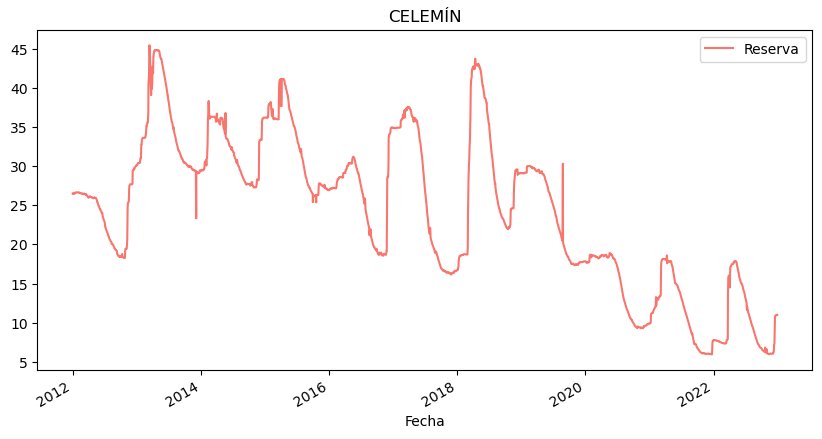

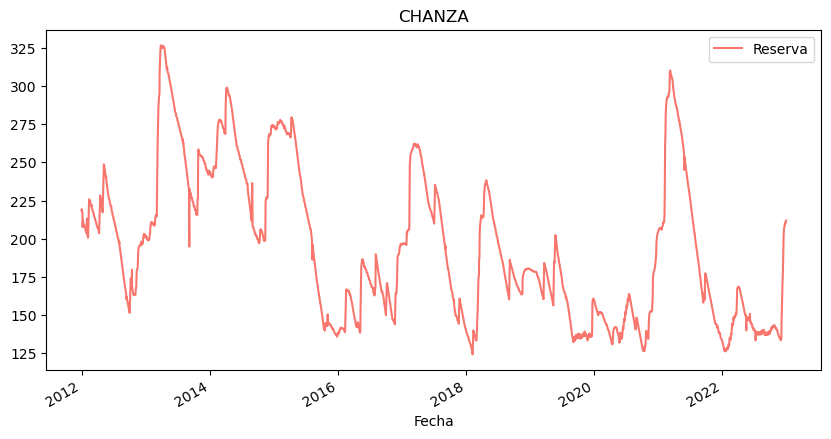

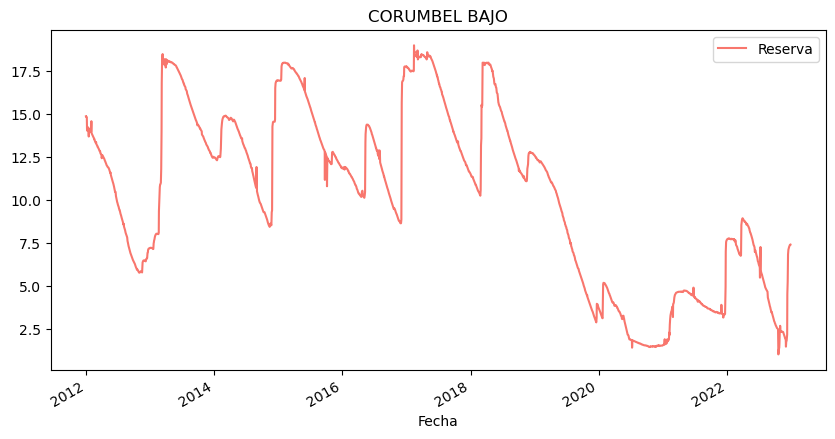

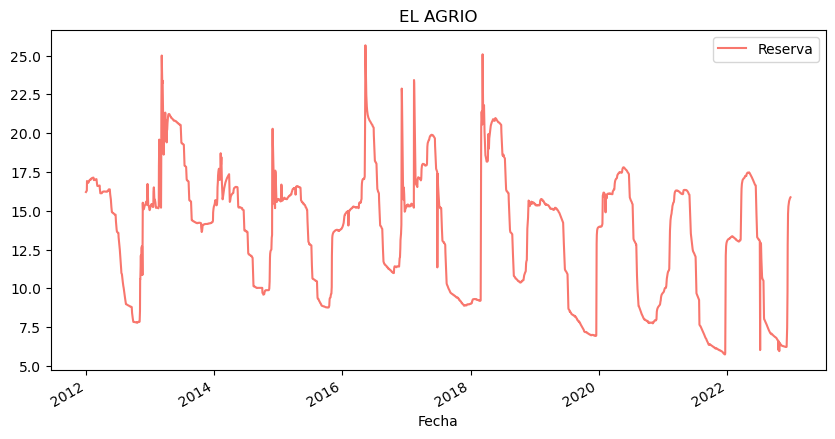

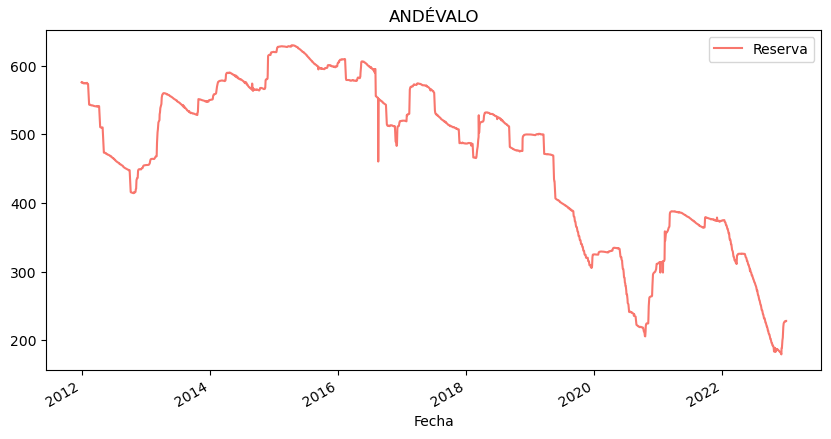

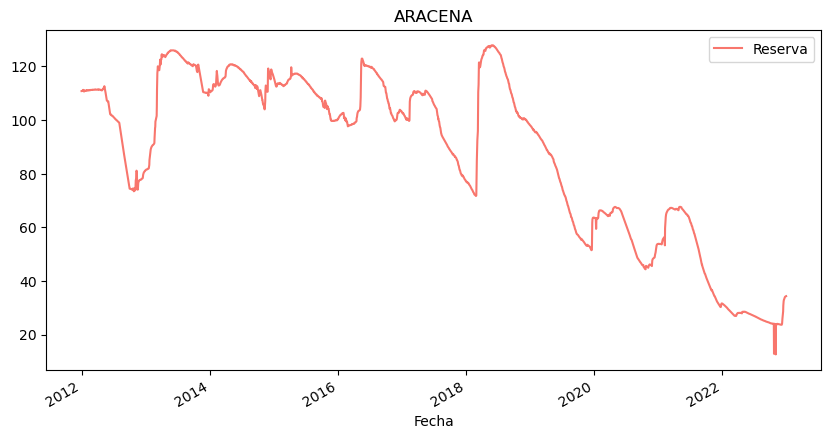

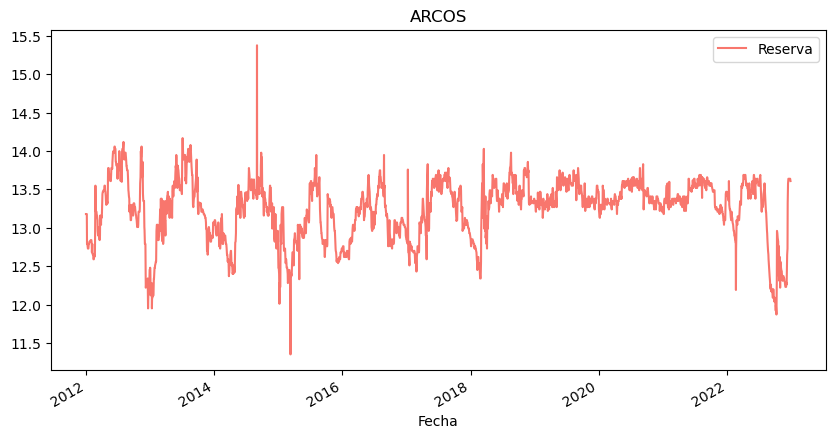

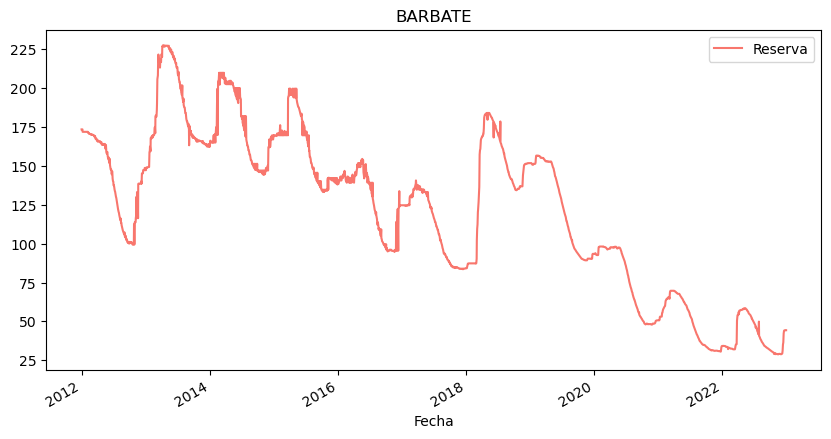

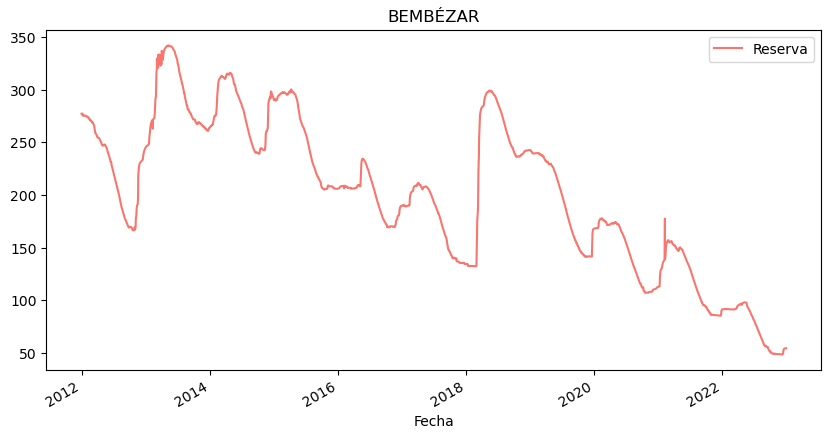

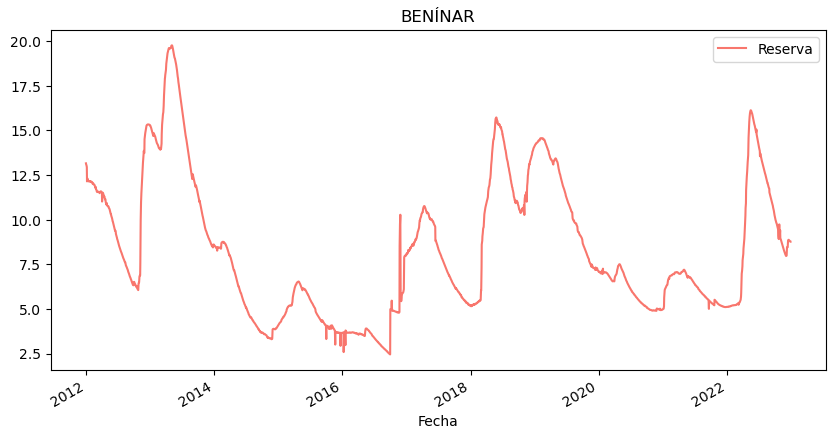

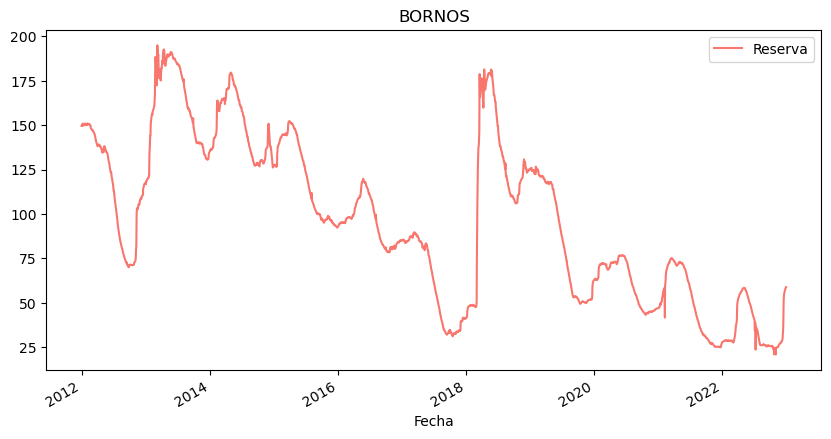

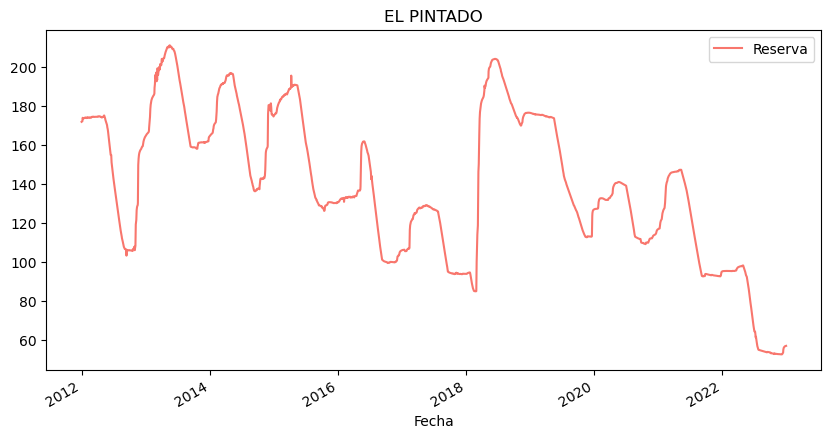

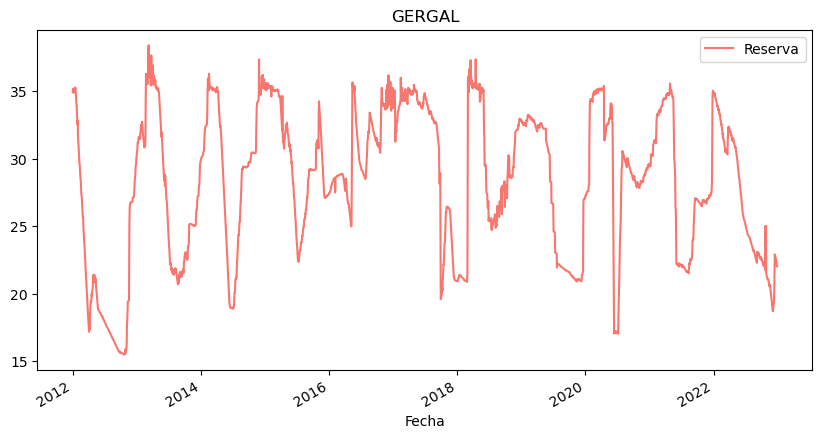

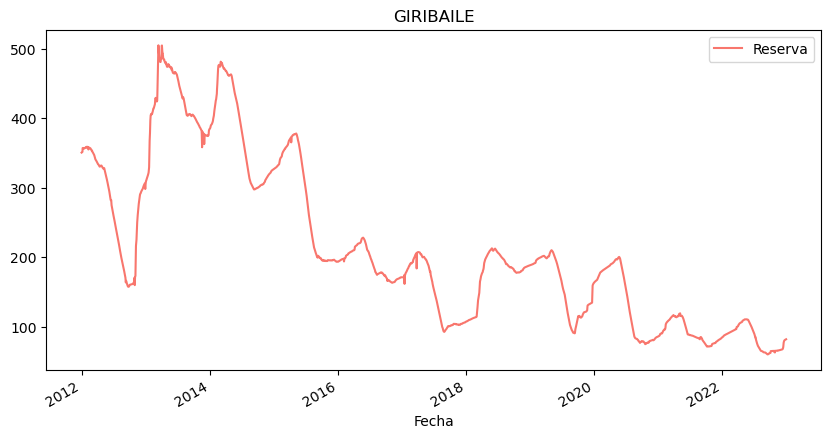

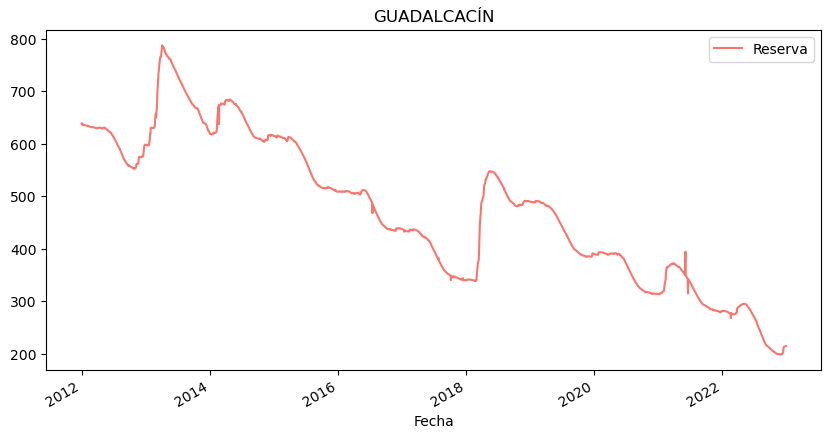

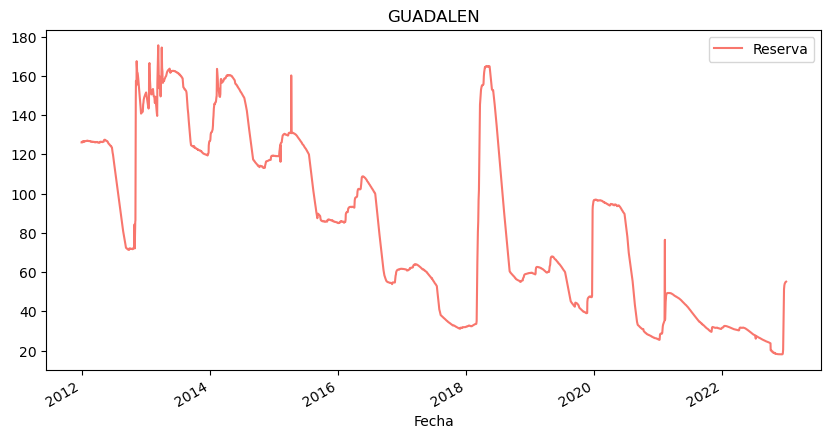

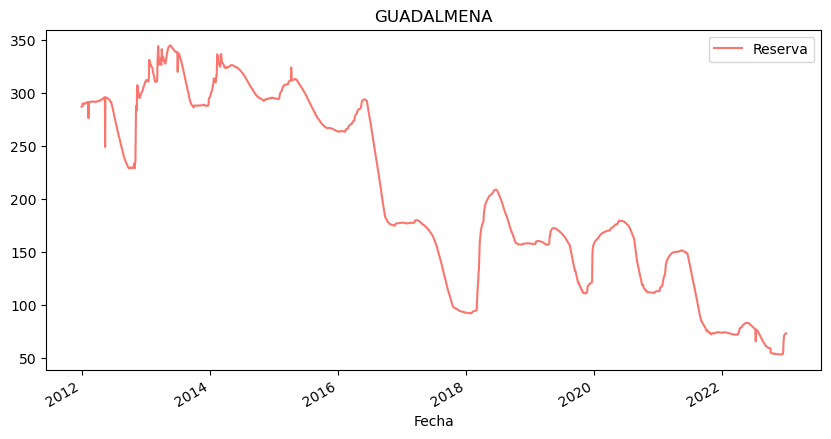

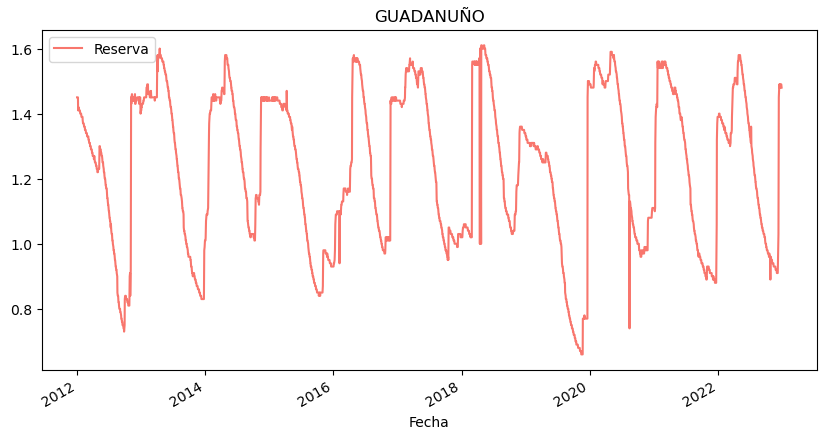

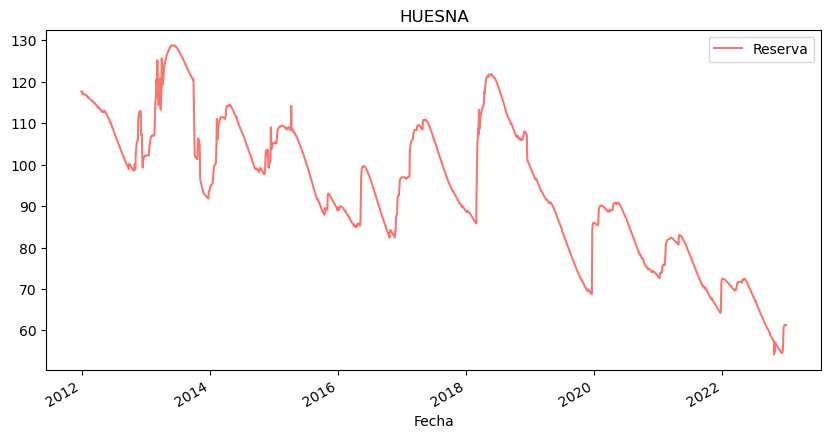

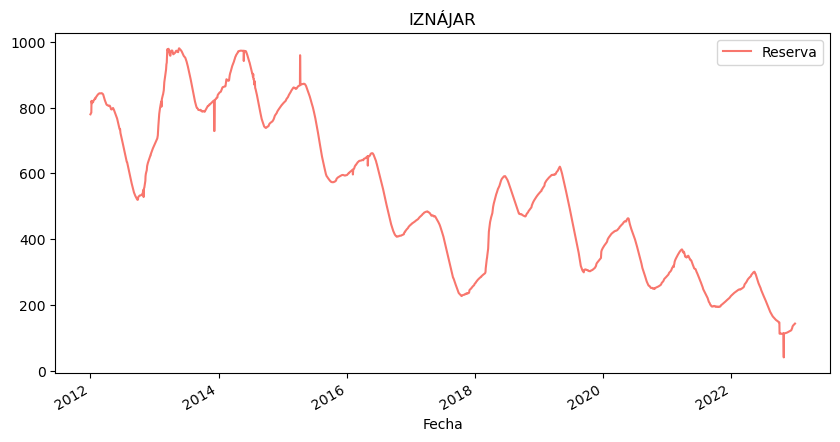

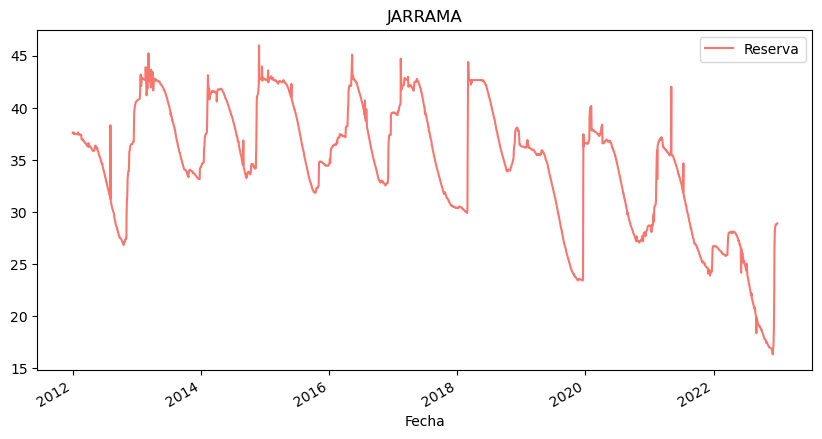

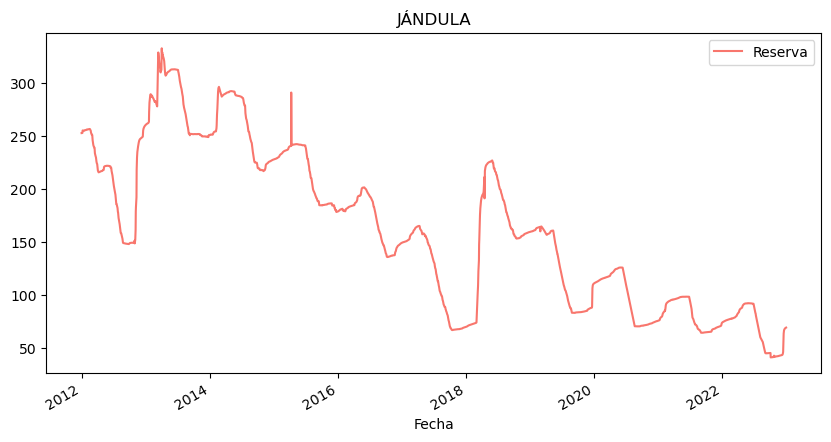

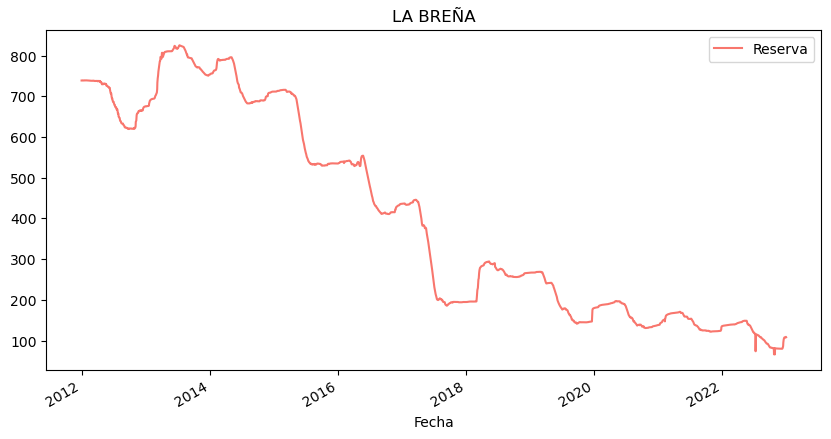

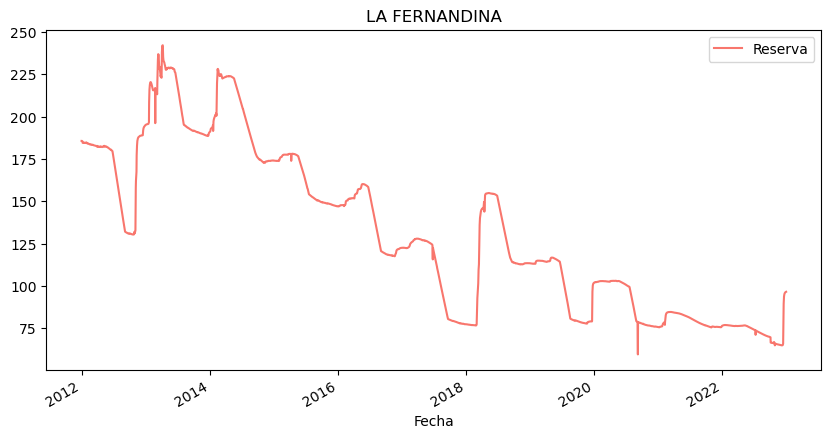

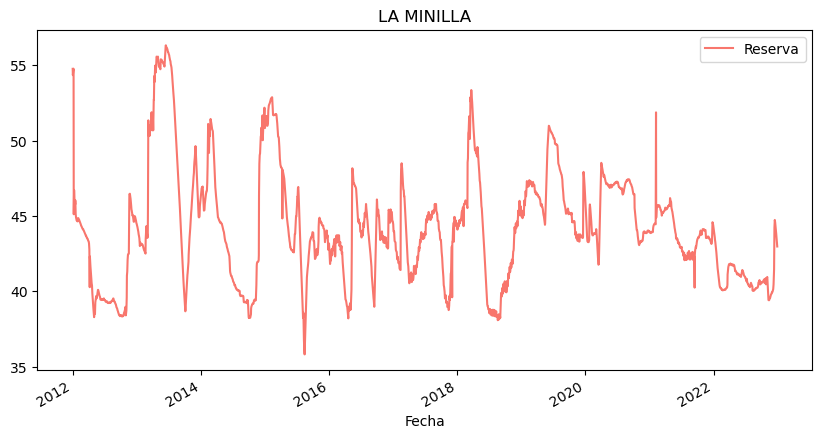

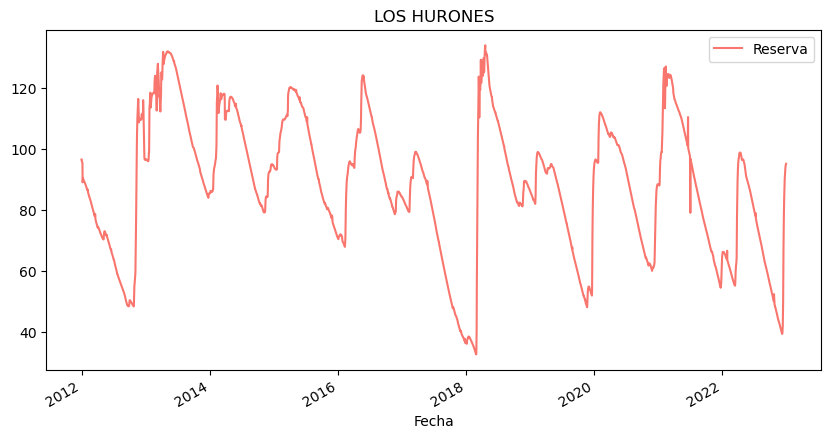

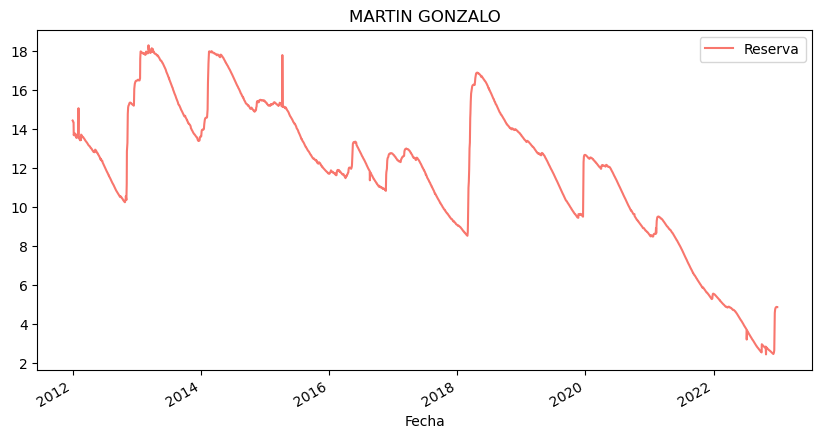

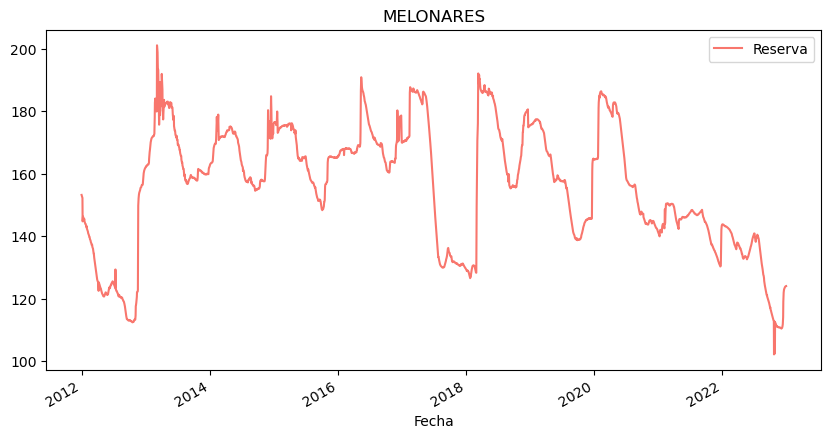

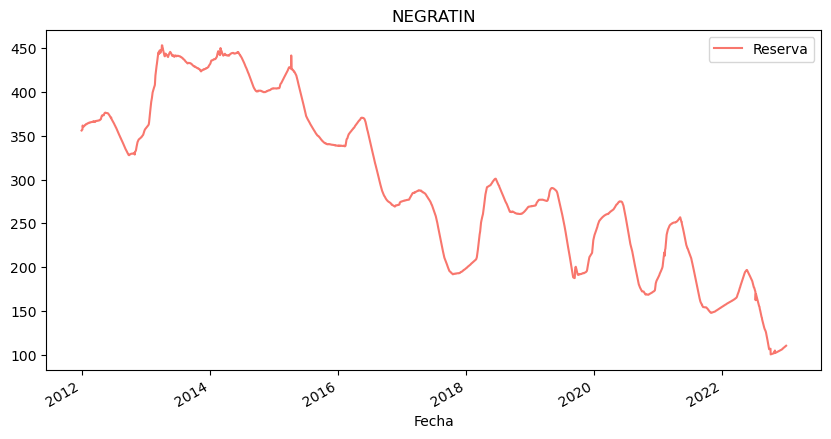

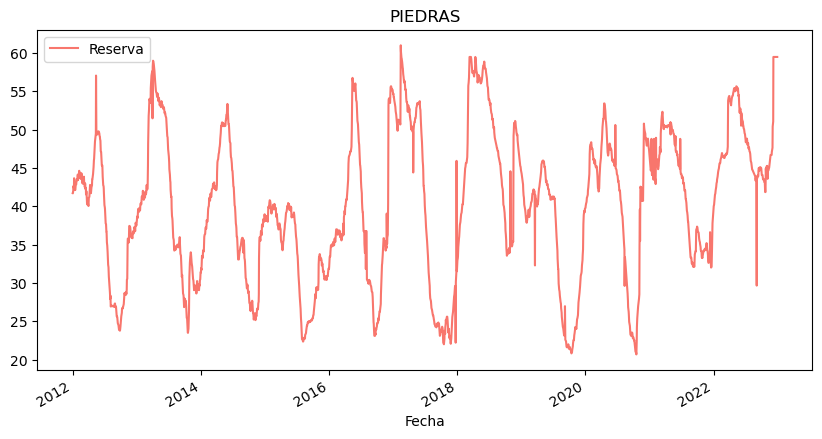

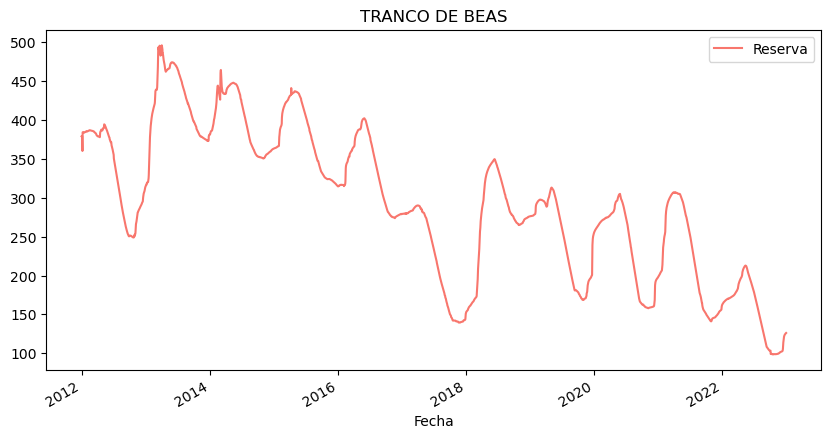

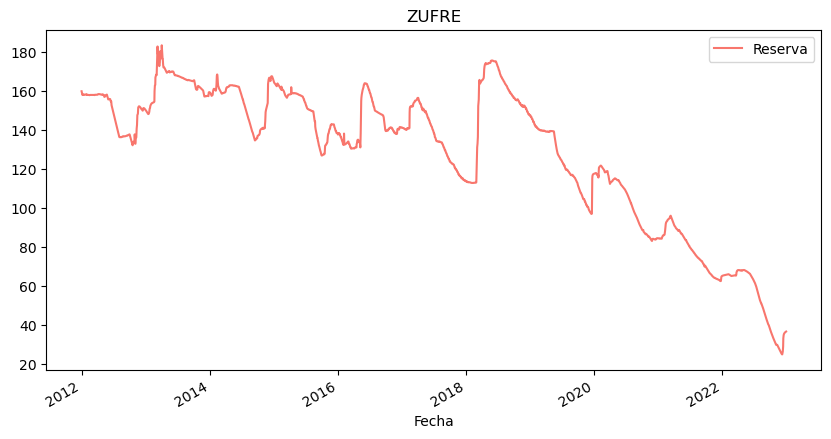

In [131]:
datasets = {}
for name in f:
    datasets[name]= concatenarAnnos(name)
for i in inaceptables:
    datasets.get(list(i.keys())[0]).plot(style='-', figsize=(10,5), color=color_pal[0], title=list(i.keys())[0])
    plt.show()
    

In [98]:
# Vamos a probar con el primero, ya arreglao

num_epochs = 12000
learning_rate = 0.01

input_size = 1
hidden_size = 4
num_layers = 1
num_classes = 1                 

train_percentage = ((7*100)/11)
seq_length = 21

gru, dataX, dataY, eficiencia = entrenarGRU(datasets.get("CELEMÍN"), train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(gru, dataX, dataY)

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.2887539863586426 MAPE: 0.811656191945076


0.288754

SI, FUNCIONA; LA VIRGEN SANTISIMA

In [139]:
pbart = tqdm(inaceptables,total=len(inaceptables))
redesN = {}
for name in pbart:
    pbart.set_description("Dataset " + list(name.keys())[0])
    mse, gru = multipleEntrenamiento(datasets.get(list(name.keys())[0]))
    redesN[list(name.keys())[0]] = {"mse": mse, "model": gru}

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.30312639474868774 MAPE: 0.8076929487287998


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.2980043888092041 MAPE: 0.8530297316610813


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.30040499567985535 MAPE: 0.826549343764782


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.2951869070529938 MAPE: 0.8442395366728306


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.2918250858783722 MAPE: 0.8311129175126553


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.30021029710769653 MAPE: 0.8194313384592533


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3081463873386383 MAPE: 0.8406511507928371


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.2835939824581146 MAPE: 0.9781625121831894


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.29340860247612 MAPE: 0.8473267778754234


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.05566120147705 MAPE: 0.9134865365922451


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.683490753173828 MAPE: 0.6995985750108957


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 9.264451026916504 MAPE: 0.73153181001544


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.942819595336914 MAPE: 0.7067978847771883


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.824263572692871 MAPE: 0.7054054643958807


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.659953117370605 MAPE: 0.7023001089692116


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 9.991158485412598 MAPE: 0.8086245507001877


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 8.881166458129883 MAPE: 0.7137102074921131


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.598461151123047 MAPE: 1.0509064421057701


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.07523031532764435 MAPE: 1.17713687941432


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.07673762738704681 MAPE: 1.1273336596786976


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.07663863152265549 MAPE: 1.260226033627987


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.07604078948497772 MAPE: 1.379186101257801


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.07601849734783173 MAPE: 1.1038220487535


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.07531409710645676 MAPE: 1.1163472197949886


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.07602674514055252 MAPE: 1.1193063110113144


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.07509800046682358 MAPE: 1.155935414135456


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.07656096667051315 MAPE: 1.0896974243223667


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.26664236187934875 MAPE: 1.3479528948664665


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.28491875529289246 MAPE: 1.3712766580283642


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.2647537887096405 MAPE: 1.4863490127027035


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.2910458445549011 MAPE: 1.402821484953165


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.31871309876441956 MAPE: 1.4664778485894203


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.27523863315582275 MAPE: 1.6068873926997185


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.26784077286720276 MAPE: 1.4553324319422245


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.2734939455986023 MAPE: 1.2632152065634727


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.26887428760528564 MAPE: 1.3898669742047787


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 13.256178855895996 MAPE: 0.30607087537646294


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 12.87487506866455 MAPE: 0.3138642059639096


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 13.190093040466309 MAPE: 0.3093187464401126


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 15.134272575378418 MAPE: 0.31628524884581566


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 14.036510467529297 MAPE: 0.31103258952498436


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 25.55487823486328 MAPE: 0.7691161707043648


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 13.918172836303711 MAPE: 0.31298266258090734


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 13.306097030639648 MAPE: 0.31073587015271187


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 14.036555290222168 MAPE: 0.311329890973866


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.645493745803833 MAPE: 0.4824709612876177


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.6410526037216187 MAPE: 0.4570659715682268


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.6481838822364807 MAPE: 0.4517866764217615


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.6393728852272034 MAPE: 0.4730409476906061


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.6469882726669312 MAPE: 0.4722378682345152


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.6891944408416748 MAPE: 0.501250009983778


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.8059363961219788 MAPE: 0.7186275906860828


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.6400149464607239 MAPE: 0.4766883794218302


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.7546099424362183 MAPE: 1.441905740648508


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.015385141596198082 MAPE: 0.569417979568243


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.01607128418982029 MAPE: 0.567862018942833


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.015404121950268745 MAPE: 0.5707797594368458


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.015612589195370674 MAPE: 0.5639647133648396


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.01396490354090929 MAPE: 0.5448666401207447


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.015233902260661125 MAPE: 0.5560669116675854


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.015260416083037853 MAPE: 0.5713245831429958


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.015110110864043236 MAPE: 0.5639397073537111


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.01641112193465233 MAPE: 0.6052965763956308


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.242377758026123 MAPE: 0.891795102506876


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.103708744049072 MAPE: 0.9171477518975735


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.503340244293213 MAPE: 0.9862722828984261


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.155127048492432 MAPE: 0.9361710399389267


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.394258975982666 MAPE: 0.9126621298491955


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.162015914916992 MAPE: 0.8931557647883892


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.2022504806518555 MAPE: 0.9107749909162521


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.396533012390137 MAPE: 0.8998996578156948


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.110570430755615 MAPE: 0.8835919201374054


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.7414193153381348 MAPE: 0.36563039757311344


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.60195255279541 MAPE: 0.35594410728663206


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.6755595207214355 MAPE: 0.37617941852658987


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.77598237991333 MAPE: 0.3595141228288412


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.6628966331481934 MAPE: 0.3624947043135762


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.660207748413086 MAPE: 0.3775788936764002


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.506681203842163 MAPE: 0.3673496888950467


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.7723515033721924 MAPE: 0.3664744785055518


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.005166053771973 MAPE: 0.495980866253376


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.024531085044145584 MAPE: 0.9285533800721169


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.02776576578617096 MAPE: 0.8952519856393337


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.022148992866277695 MAPE: 0.8142371661961079


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.022680532187223434 MAPE: 0.8394390344619751


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.023681815713644028 MAPE: 0.8341905660927296


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.029923703521490097 MAPE: 0.9603339247405529


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.02238958701491356 MAPE: 0.8201487362384796


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.026607554405927658 MAPE: 0.8797329850494862


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.024652525782585144 MAPE: 0.8641351945698261


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.9419078826904297 MAPE: 1.3014859519898891


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.815748929977417 MAPE: 0.889146700501442


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.120283603668213 MAPE: 0.9934375062584877


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.791849136352539 MAPE: 0.8803839795291424


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.001439094543457 MAPE: 0.8987144567072392


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.823138952255249 MAPE: 0.8721830323338509


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.9509060382843018 MAPE: 0.8968514390289783


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.6729230880737305 MAPE: 0.8930112235248089


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.871565818786621 MAPE: 0.8917301893234253


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0003435611724854 MAPE: 0.3043079748749733


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0556458234786987 MAPE: 0.29488790314644575


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.903842449188232 MAPE: 1.4344606548547745


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0427404642105103 MAPE: 0.29233619570732117


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.043358564376831 MAPE: 0.28587072156369686


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0633573532104492 MAPE: 0.28661792166531086


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0953104496002197 MAPE: 0.8237404748797417


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0625051259994507 MAPE: 0.2907449612393975


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.0391197204589844 MAPE: 0.29379427433013916


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.34596407413482666 MAPE: 1.0338875465095043


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.33807262778282166 MAPE: 0.917311105877161


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.35453808307647705 MAPE: 1.117538008838892


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3439815938472748 MAPE: 0.9717699140310287


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.33957695960998535 MAPE: 0.9559341706335545


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3356451392173767 MAPE: 0.9457042440772057


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3407436013221741 MAPE: 1.0032315738499165


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3428107500076294 MAPE: 0.9591871872544289


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3306353986263275 MAPE: 1.0322637856006622


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.001205921173096 MAPE: 0.48340228386223316


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.804569244384766 MAPE: 0.4554192069917917


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.88232421875 MAPE: 0.45028277672827244


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.6705522537231445 MAPE: 0.4425192251801491


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.969911575317383 MAPE: 0.48856865614652634


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.7540998458862305 MAPE: 0.43661906383931637


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.935985088348389 MAPE: 0.43803947046399117


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 9.29354476928711 MAPE: 1.005206722766161


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.859447956085205 MAPE: 0.441582128405571


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.080965042114258 MAPE: 0.1909594051539898


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.112305641174316 MAPE: 0.187344616279006


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.058265686035156 MAPE: 0.17923216801136732


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.139091968536377 MAPE: 0.19457623129710555


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.970815658569336 MAPE: 0.2771149855107069


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 9.956482887268066 MAPE: 0.45140646398067474


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.128901958465576 MAPE: 0.1948757329955697


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.072807312011719 MAPE: 0.18333506304770708


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 12.439695358276367 MAPE: 0.5090074148029089


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.644821643829346 MAPE: 1.1804725974798203


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.344060897827148 MAPE: 0.9932811371982098


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.760880947113037 MAPE: 1.0249053128063679


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.260550498962402 MAPE: 1.0553854517638683


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 7.288215637207031 MAPE: 0.9201482869684696


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.308115005493164 MAPE: 1.2855403125286102


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 6.028076171875 MAPE: 1.0809795930981636


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.165948390960693 MAPE: 1.0042281821370125


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.9959917068481445 MAPE: 0.9850306436419487


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.422913551330566 MAPE: 0.3349630394950509


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.070841312408447 MAPE: 0.5197816528379917


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.656007289886475 MAPE: 0.3361890325322747


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.713045120239258 MAPE: 0.3423755522817373


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.7330169677734375 MAPE: 0.34164045937359333


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.880704402923584 MAPE: 0.7310184184461832


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.687693119049072 MAPE: 0.3392426762729883


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.3017730712890625 MAPE: 0.32767937518656254


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.762064456939697 MAPE: 0.603840546682477


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.0008251523831859231 MAPE: 0.9363302029669285


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.0010016943560913205 MAPE: 0.9273788891732693


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.00103654433041811 MAPE: 0.939234159886837


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.0010166795691475272 MAPE: 0.9860383346676826


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.0008779040654189885 MAPE: 0.9879589080810547


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.0008658415754325688 MAPE: 0.8913660421967506


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.0013570748269557953 MAPE: 1.0160279460251331


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.0011665752390399575 MAPE: 1.019552256911993


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.0011050062021240592 MAPE: 1.1988043785095215


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.6076524257659912 MAPE: 0.28427019715309143


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.632577657699585 MAPE: 0.28343615122139454


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.6037653088569641 MAPE: 0.28143664821982384


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.6038616299629211 MAPE: 0.2696520648896694


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.6210078597068787 MAPE: 0.28148468118160963


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.6203805208206177 MAPE: 0.28102356009185314


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.6378360390663147 MAPE: 0.28711038175970316


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.6065543293952942 MAPE: 0.27099549770355225


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.6161449551582336 MAPE: 0.3116320353001356


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 27.43229103088379 MAPE: 0.49628918059170246


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 26.949237823486328 MAPE: 0.49692559987306595


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 26.608022689819336 MAPE: 0.5009114742279053


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 26.84751319885254 MAPE: 0.493933679535985


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 27.317689895629883 MAPE: 0.5000121425837278


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 26.2087459564209 MAPE: 0.4912878852337599


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 26.616811752319336 MAPE: 0.49566072411835194


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 27.508617401123047 MAPE: 0.5088429432362318


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 27.034263610839844 MAPE: 0.5087280180305243


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.33667969703674316 MAPE: 0.5355972331017256


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3413509726524353 MAPE: 0.5425705574452877


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.32382145524024963 MAPE: 0.5444672890007496


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3546648323535919 MAPE: 0.5431010387837887


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.3485727310180664 MAPE: 0.5424808710813522


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.33297497034072876 MAPE: 0.5363480187952518


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.34403055906295776 MAPE: 0.5484621040523052


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.34838199615478516 MAPE: 0.5501191597431898


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 7.218106269836426 MAPE: 7.718409597873688


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.387342929840088 MAPE: 0.429181894287467


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.319244861602783 MAPE: 0.41475147008895874


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.816829204559326 MAPE: 0.4402569495141506


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.598647594451904 MAPE: 0.4329405725002289


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.977576732635498 MAPE: 1.0689770802855492


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.826381683349609 MAPE: 0.425846129655838


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.60692834854126 MAPE: 0.425103260204196


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.806252956390381 MAPE: 0.43100803159177303


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.924811840057373 MAPE: 0.5274732131510973


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.2849507331848145 MAPE: 0.3896418958902359


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 5.7697248458862305 MAPE: 0.48254928551614285


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.409553527832031 MAPE: 0.40496261790394783


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.6802754402160645 MAPE: 0.4144827835261822


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.480533123016357 MAPE: 0.40160659700632095


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.597472190856934 MAPE: 0.4090305417776108


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 12.965903282165527 MAPE: 1.1078767478466034


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.803793430328369 MAPE: 0.45903665013611317


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.652777194976807 MAPE: 0.44598900713026524


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.040829658508301 MAPE: 0.31024827621877193


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.9848642349243164 MAPE: 0.3250440815463662


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0092906951904297 MAPE: 0.3156687831506133


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.6469664573669434 MAPE: 0.6139348726719618


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.8598376512527466 MAPE: 0.29978840611875057


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0046119689941406 MAPE: 0.41948645375669


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.042681932449341 MAPE: 0.31891693361103535


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.9716957807540894 MAPE: 0.31727070454508066


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.850241780281067 MAPE: 0.30491005163639784


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.19997599720954895 MAPE: 0.472006481140852


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.20460200309753418 MAPE: 0.542929582297802


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.19522997736930847 MAPE: 0.46300627291202545


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.20357561111450195 MAPE: 0.47986037097871304


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.19971221685409546 MAPE: 0.47870916314423084


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.19674856960773468 MAPE: 0.46652243472635746


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.20023854076862335 MAPE: 0.4809632897377014


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.19799479842185974 MAPE: 0.479419669136405


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.18237867951393127 MAPE: 0.4594727884978056


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.1015243530273438 MAPE: 0.8880394510924816


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.9873907566070557 MAPE: 0.6658600643277168


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.8815642595291138 MAPE: 0.6889950949698687


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.758207082748413 MAPE: 0.6567354779690504


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.0253663063049316 MAPE: 0.6806036923080683


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.010071039199829 MAPE: 0.6904940120875835


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.1130177974700928 MAPE: 0.6836052983999252


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.9430737495422363 MAPE: 0.8223538286983967


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.2626354694366455 MAPE: 0.7422987371683121


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.017159927636384964 MAPE: 0.35498389042913914


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.018337463960051537 MAPE: 0.380422780290246


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.017388559877872467 MAPE: 0.37129931151866913


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.018312696367502213 MAPE: 0.38938610814511776


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.01992729865014553 MAPE: 0.4392523318529129


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.018158474937081337 MAPE: 0.36356833297759295


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.017846152186393738 MAPE: 0.379346520639956


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.016718413680791855 MAPE: 0.4105829633772373


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.02553451433777809 MAPE: 1.0348706506192684


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.1963162422180176 MAPE: 0.3512192517518997


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.3042807579040527 MAPE: 0.818647351115942


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.631608009338379 MAPE: 0.7960165850818157


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.1871466636657715 MAPE: 0.35350362304598093


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.2445242404937744 MAPE: 0.3559942124411464


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.2594106197357178 MAPE: 0.3596722846850753


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.18725848197937 MAPE: 0.35585975274443626


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.8636271953582764 MAPE: 0.639883941039443


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 2.177788496017456 MAPE: 0.3572316840291023


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.9592585563659668 MAPE: 0.21459509152919054


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.8864506483078003 MAPE: 0.18880461575463414


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.9199475646018982 MAPE: 0.194479594938457


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.8863036632537842 MAPE: 0.1884977798908949


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.8810176253318787 MAPE: 0.18543307669460773


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.1436781883239746 MAPE: 0.25039869360625744


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.903934121131897 MAPE: 0.19393956754356623


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.9671428203582764 MAPE: 0.20371493883430958


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.9098359942436218 MAPE: 0.19867243245244026


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.2752221822738647 MAPE: 1.3493869453668594


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.1678725481033325 MAPE: 1.361289620399475


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.346923828125 MAPE: 1.505358051508665


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.3216803073883057 MAPE: 1.7580050975084305


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.1386709213256836 MAPE: 1.3792851008474827


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.21501886844635 MAPE: 1.3860293664038181


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.227059006690979 MAPE: 1.4216499403119087


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.3161174058914185 MAPE: 1.359831541776657


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 1.179023027420044 MAPE: 1.432761363685131


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.5857222080230713 MAPE: 0.2882985631003976


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.611440658569336 MAPE: 0.29012507293373346


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.591404438018799 MAPE: 0.288114370778203


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 11.720666885375977 MAPE: 0.8838302455842495


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.7369680404663086 MAPE: 0.3118163673207164


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.6000072956085205 MAPE: 0.29210601933300495


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.669602155685425 MAPE: 0.2986501669511199


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.7377030849456787 MAPE: 0.3063860582187772


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 3.5657413005828857 MAPE: 0.28819520957767963


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.8689497709274292 MAPE: 0.3056674264371395


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.8661361932754517 MAPE: 0.289956689812243


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.8641772866249084 MAPE: 0.2884821966290474


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.8669469952583313 MAPE: 0.29598684050142765


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.8663778305053711 MAPE: 0.29001354705542326


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.8700821995735168 MAPE: 0.2827733289450407


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.8676555156707764 MAPE: 0.2961650723591447


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 4.292888164520264 MAPE: 1.3177795335650444


  0%|          | 0/12000 [00:00<?, ?it/s]

MSE: 0.8630837202072144 MAPE: 0.29805011581629515


Bueno, algunos que otros están regular, pero problema para luego

In [145]:
for i in redesN.keys():
    torch.save(redesN.get(i).get("model"), "C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/"+i+".pt")

## Repaso de como va la cosa

In [60]:
# Cargamos los datasets

f = os.listdir("C:/Users\juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/")

f.remove("AEMET")
f.remove("codes.json")
f.remove("dataObtainer.py")
f.remove("descarga.json")
f.remove("estacionesAndaluzas.json")
f.remove("pantanoLocator.py")
f.remove("weatherDataObtainer.py")
f.remove("weatherDataStationObtainer.py")
f.remove("coordenadasPantanos.json") # Por motivos más que obvios
f.remove("stationAsigner.py")
f.remove("wikipediaExractor.py")
f.remove("asignaciones.json")
f.remove("dataFormatter.py")

datasets = {}
redes = {} ######## DECOMENTAR

for name in f:
    datasets[name]= concatenarAnnos(name)
    
# Los modelos tmb
names = os.listdir("C:/Users\juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/")
for i in names:
    dir = "C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/"+i
    redes[i] = {torch.load(dir)}

In [61]:
redesN = {}
for i in redes:
    name = rename(i)
    redesN[name] = redes.get(i)
redes = redesN

In [62]:
# Esto no funciona para todos los datasets, porque algunos tienen una división diferente, hay que modificarlo
diferencias14=["ANDÉVALO", "GUADALCACÍN","CHANZA", "IZNÁJAR"]
eficiencias = {}
for i in redes:
    if i in diferencias14:
        dataX, dataY = dividirSets(datasets.get(i), 14)
    else:    
        dataX, dataY = dividirSets(datasets.get(i), 21)
    print(i)
    eficiencias[i] = {"modelo" : next(iter(redes.get(i))), "mse" : medirPrecision(next(iter(redes.get(i))), dataX, dataY)}

AGUASCEBAS
MSE: 0.04199230670928955 MAPE: 0.8630892261862755
ALMODÓVAR
MSE: 0.00698858592659235 MAPE: 1.03318952023983
ANDÉVALO
MSE: 4.792384624481201 MAPE: 0.3009745152667165
ARACENA
MSE: 0.6393728852272034 MAPE: 0.4730409476906061
ARCOS
MSE: 0.01396490354090929 MAPE: 0.5448666401207447
ARENOSO
MSE: 4.3859429359436035 MAPE: 0.7494174409657717
BARBATE
MSE: 3.553697109222412 MAPE: 0.8748027496039867
BEMBÉZAR
MSE: 3.506681203842163 MAPE: 0.3673496888950467
BENÍNAR
MSE: 0.022148992866277695 MAPE: 0.8142371661961079
BORNOS
MSE: 2.6729230880737305 MAPE: 0.8930112235248089
BÉZNAR
MSE: 1.1268502473831177 MAPE: 0.6645905785262585
CALA
MSE: 1.8017456531524658 MAPE: 1.4131768606603146
CANALES
MSE: 2.0190978050231934 MAPE: 0.8910792879760265
CASASOLA
MSE: 1.0249465703964233 MAPE: 1.1661776341497898
CELEMÍN
MSE: 0.2835939824581146 MAPE: 0.9781625121831894
CHANZA
MSE: 4.506444454193115 MAPE: 0.685124984011054
CHARCO REDONDO
MSE: 0.9690480828285217 MAPE: 1.0497421026229858
COLOMERA
MSE: 0.2123028934

C:\Users\juanm\AppData\Local\Temp\ipykernel_9124\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


DAÑADOR
MSE: 1.0561683177947998 MAPE: 2.2358298301696777
EL AGRIO
MSE: 0.2647537887096405 MAPE: 1.4863490127027035
EL PINTADO
MSE: 1.0003435611724854 MAPE: 0.3043079748749733
EL PORTILLO
MSE: 0.2754027843475342 MAPE: 0.8036493323743343
FRANCISCO ABELLAN
MSE: 0.21737562119960785 MAPE: 0.6301394663751125
GERGAL
MSE: 0.3306353986263275 MAPE: 1.0322637856006622
GIRIBAILE
MSE: 4.6705522537231445 MAPE: 0.4425192251801491
GUADALCACÍN
MSE: 4.991438388824463 MAPE: 0.22157691419124603
GUADALEN
MSE: 4.760880947113037 MAPE: 1.0249053128063679
GUADALHORCE
MSE: 1.5211074352264404 MAPE: 0.5562991369515657
GUADALMELLATO
MSE: 1.7113903760910034 MAPE: 0.5082436837255955
GUADALMENA
MSE: 4.3017730712890625 MAPE: 0.32767937518656254
GUADALTEBA
MSE: 1.186783790588379 MAPE: 0.3202134044840932
GUADANUÑO
MSE: 0.0008251523831859231 MAPE: 0.9363302029669285
GUADARRANQUE
MSE: 3.2046780586242676 MAPE: 3.5150397568941116
HUESNA
MSE: 0.6037653088569641 MAPE: 0.28143664821982384
IZNÁJAR
MSE: 18.11899757385254 MAPE: 0

C:\Users\juanm\AppData\Local\Temp\ipykernel_9124\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [63]:
inaceptables = []
for i in eficiencias:
    if eficiencias.get(i).get("mse") >= 5:
        inaceptables.append({i:eficiencias.get(i).get("mse")})
    
inaceptables

[{'IZNÁJAR': 18.118998}]

Bueno, de 32 a 5 es una buena mejora, vamos a ver si los podemos bajar, a ver como están los gráficos

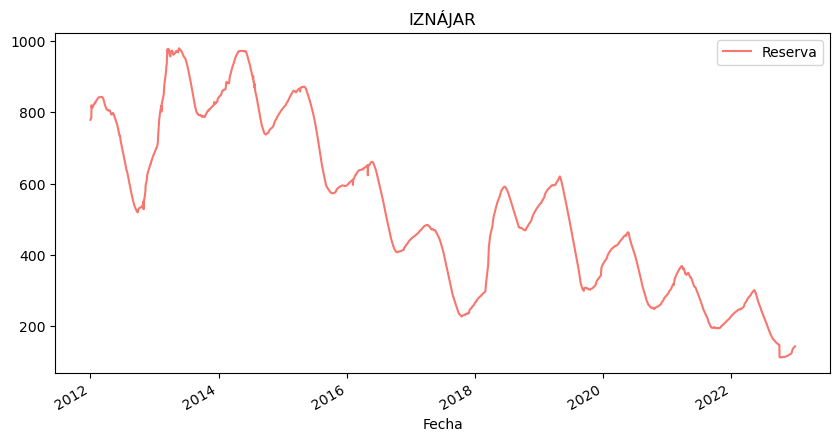

In [64]:
for i in inaceptables:
    datasets.get(list(i.keys())[0]).plot(style='-', figsize=(10,5), color=color_pal[0], title=list(i.keys())[0])
    plt.show()

Pues no entiendo por qué están tan mal ¿Lstm?

In [22]:
num_epochs = 9000
learning_rate = 0.01

input_size = 1
hidden_size = 6
num_layers = 1
num_classes = 1

train_percentage = ((7*100)/11)
seq_length = 28

lstm, dataX, dataY, eficiencia = entrenarLSTM(datasets.get("ANDÉVALO"), train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(lstm, dataX, dataY)

  0%|          | 0/9000 [00:00<?, ?it/s]

MSE: 14965.6845703125 MAPE: 27.389028668403625


14965.685

No tiene pinta. ¿Con más épocas?

In [23]:
num_epochs = 15000
learning_rate = 0.01

input_size = 1
hidden_size = 6
num_layers = 1
num_classes = 1

train_percentage = ((7*100)/11)
seq_length = 28

lstm, dataX, dataY, eficiencia = entrenarLSTM(datasets.get("ANDÉVALO"), train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(lstm, dataX, dataY)

  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 17011.744140625 MAPE: 29.20374870300293


17011.744

Nop, volvamos a GRU, a ver que podemos hacer

In [25]:
num_epochs = 20000
learning_rate = 0.01

input_size = 1
hidden_size = 4
num_layers = 1
num_classes = 1                 

train_percentage = ((7*100)/11)
seq_length = 21

gru, dataX, dataY, eficiencia = entrenarGRU(datasets.get("ANDÉVALO"), train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(gru, dataX, dataY)

  0%|          | 0/20000 [00:00<?, ?it/s]

MSE: 12.91703987121582 MAPE: 0.3030529245734215


12.91704

In [33]:
num_epochs = 20000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 6
num_classes = 1                 

train_percentage = ((7*100)/11)
seq_length = 14

gru, dataX, dataY, eficiencia = entrenarGRU(datasets.get("ANDÉVALO"), train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(gru, dataX, dataY)

  0%|          | 0/20000 [00:00<?, ?it/s]

MSE: 10.223831176757812 MAPE: 0.32377245370298624


10.223831

In [50]:
num_epochs = 15000
learning_rate = 0.01

input_size = 1
hidden_size = 3
num_layers = 6
num_classes = 1                 

train_percentage = ((7*100)/11)
seq_length = 21

gru, dataX, dataY, eficiencia = entrenarGRU(datasets.get("ANDÉVALO"), train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(gru, dataX, dataY)

  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 8.850619316101074 MAPE: 0.3298475407063961


8.850619

Esta configuración parece que vá mejor, vamos a ver con todos

In [19]:
def multipleEntrenamiento2(dataset):
    mejor = 100
    modelo = None
    
    num_epochs = 15000
    learning_rate = 0.01

    input_size = 1
    hidden_size = 3
    num_layers = 6
    num_classes = 1                 

    train_percentage = ((7*100)/11)
    seq_length = 21

    pbar = tqdm(range(5))
    for i in pbar:
        pbar.set_description("Entrenamiento "+str(i))
        gru, dataX, dataY, eficiencia = entrenarGRU(dataset, train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
        mse = medirPrecision(gru, dataX, dataY)
        if mse < mejor:
            mejor = mse
            modelo = gru
        
    return mejor, modelo

mse5, gru5 = multipleEntrenamiento2(datasets.get("IZNÁJAR"))

mse1, gru1 = multipleEntrenamiento2(datasets.get("ANDÉVALO"))

mse2, gru2 = multipleEntrenamiento2(datasets.get("BARBATE"))

mse3, gru3 = multipleEntrenamiento2(datasets.get("CHANZA"))

mse4, gru4 = multipleEntrenamiento2(datasets.get("GUADALCACÍN"))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 19.384960174560547 MAPE: 0.455135153606534


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 20.694835662841797 MAPE: 0.4844547715038061


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 21.703916549682617 MAPE: 0.6370962131768465


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 19.173439025878906 MAPE: 0.4669646732509136


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 20.844356536865234 MAPE: 0.48874616622924805


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 10.156790733337402 MAPE: 0.35063852556049824


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 8.735963821411133 MAPE: 0.3230311209335923


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 11.098973274230957 MAPE: 0.31317754182964563


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 112.97970581054688 MAPE: 2.132646180689335


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 18.986984252929688 MAPE: 0.759782362729311


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 5.192754745483398 MAPE: 1.0851663537323475


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 3.553697109222412 MAPE: 0.8748027496039867


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 8.030913352966309 MAPE: 1.8276575952768326


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 4.550865173339844 MAPE: 0.9032669477164745


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 4.19659948348999 MAPE: 0.9379647672176361


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 6.726322174072266 MAPE: 0.7311002817004919


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 7.771117687225342 MAPE: 0.7213902659714222


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 7.276600360870361 MAPE: 0.7010397966951132


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 6.9469428062438965 MAPE: 0.6984539795666933


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 7.158565998077393 MAPE: 0.7380074821412563


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 18.887971878051758 MAPE: 0.8986148051917553


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 5.719737529754639 MAPE: 0.21991224493831396


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 5.371092796325684 MAPE: 0.2137856325134635


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 6.256600856781006 MAPE: 0.229843077249825


  0%|          | 0/15000 [00:00<?, ?it/s]

MSE: 6.120780944824219 MAPE: 0.20954457577317953


In [23]:
print(inaceptables)
print(mse1)
print(mse2)
print(mse3)
print(mse4)
print(mse5)

[{'ANDÉVALO': 8.735964}, {'CHANZA': 6.726322}, {'GUADALCACÍN': 5.371093}, {'IZNÁJAR': 19.173439}]


NameError: name 'mse1' is not defined

Eh, es una mejora considerable en muchos casos, e incluso una bajada del 5 para Barbate

In [26]:
torch.save(gru5, "C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/"+"IZNÁJAR"+".pt")

A ver si consigo mejorar un poco más, al menos para bajar de 5 los que estan muy cerca

In [44]:
num_epochs = 30000
learning_rate = 0.01

input_size = 1
hidden_size = 6
num_layers = 8
num_classes = 1                 

train_percentage = ((7*100)/11)
seq_length = 14

gru, dataX, dataY, eficiencia = entrenarGRU(datasets.get("ANDÉVALO"), train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(gru, dataX, dataY)

  0%|          | 0/30000 [00:00<?, ?it/s]

MSE: 6.001986026763916 MAPE: 0.27594943530857563


6.001986

In [33]:
num_epochs = 30000
learning_rate = 0.01

input_size = 1
hidden_size = 6
num_layers = 8
num_classes = 1                 

train_percentage = ((7*100)/11)
seq_length = 14

gru2, dataX, dataY, eficiencia = entrenarGRU(datasets.get("ANDÉVALO"), train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(gru2, dataX, dataY)

num_epochs = 30000
learning_rate = 0.01

input_size = 1
hidden_size = 6
num_layers = 8
num_classes = 1                 

train_percentage = ((7*100)/11)
seq_length = 14

gru3, dataX, dataY, eficiencia = entrenarGRU(datasets.get("CHANZA"), train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(gru3, dataX, dataY)

num_epochs = 30000
learning_rate = 0.01

input_size = 1
hidden_size = 6
num_layers = 8
num_classes = 1                 

train_percentage = ((7*100)/11)
seq_length = 14

gru4, dataX, dataY, eficiencia = entrenarGRU(datasets.get("GUADALCACÍN"), train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(gru4, dataX, dataY)

num_epochs = 30000
learning_rate = 0.01

input_size = 1
hidden_size = 6
num_layers = 8
num_classes = 1                 

train_percentage = ((7*100)/11)
seq_length = 14

gru5, dataX, dataY, eficiencia = entrenarGRU(datasets.get("IZNÁJAR"), train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(gru5, dataX, dataY)

  0%|          | 0/30000 [00:00<?, ?it/s]

MSE: 4.792384624481201 MAPE: 0.3009745152667165


  0%|          | 0/30000 [00:00<?, ?it/s]

MSE: 6.203527927398682 MAPE: 0.678651500493288


  0%|          | 0/30000 [00:00<?, ?it/s]

MSE: 4.991438388824463 MAPE: 0.22157691419124603


  0%|          | 0/30000 [00:00<?, ?it/s]

MSE: 20.463878631591797 MAPE: 0.4976875614374876


20.463879

Perfecto! A guardar

In [ ]:
torch.save(gru2, "C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/"+"ANDÉVALO"+".pt")
torch.save(gru3, "C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/"+"CHANZA"+".pt")
torch.save(gru4, "C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/"+"GUADALCACÍN"+".pt")
torch.save(gru5, "C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/"+"IZNÁJAR"+".pt")

Vamos a intentar bajar los últimos malos, Chanza e Iznájar

In [48]:
def multipleEntrenamiento2(dataset):
    mejor = 100
    modelo = None
    
    num_epochs = 15000
    learning_rate = 0.01

    input_size = 1
    hidden_size = 6
    num_layers = 8
    num_classes = 1                 

    train_percentage = ((7*100)/11)
    seq_length = 14

    pbar = tqdm(range(5))
    for i in pbar:
        pbar.set_description("Entrenamiento "+str(i))
        gru, dataX, dataY, eficiencia = entrenarGRU(dataset, train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
        mse = medirPrecision(gru, dataX, dataY)
        if mse < mejor:
            mejor = mse
            modelo = gru
        
    return mejor, modelo

In [ ]:
mse, gru3 = multipleEntrenamiento2(datasets.get("CHANZA"))
dataX, dataY = dividirSets(datasets.get("CHANZA"), 14)
medirPrecision(gru3, dataX, dataY)

In [50]:
torch.save(gru3, "C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/"+"CHANZA"+".pt")

Vale, Chanza funciona bien, a ver si conseguimos bajar Iznájar de alguna manera

In [ ]:
num_epochs = 30000
learning_rate = 0.01

input_size = 1
hidden_size = 16
num_layers = 1
num_classes = 1                 

train_percentage = ((7*100)/11)
seq_length = 14

gru5, dataX, dataY, eficiencia = entrenarLSTM(datasets.get("IZNÁJAR"), train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(gru5, dataX, dataY)

In [92]:
torch.save(gru5, "C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/"+"IZNÁJAR"+".pt")

MILAGRO casi estamos ahí

In [12]:
# Cargamos los datasets

f = os.listdir("C:/Users\juanm/Desktop/Asignaturas/Cuarto/TFG/Scrapper/")

f.remove("AEMET")
f.remove("codes.json")
f.remove("dataObtainer.py")
f.remove("descarga.json")
f.remove("estacionesAndaluzas.json")
f.remove("pantanoLocator.py")
f.remove("weatherDataObtainer.py")
f.remove("weatherDataStationObtainer.py")
f.remove("coordenadasPantanos.json") # Por motivos más que obvios
f.remove("stationAsigner.py")
f.remove("wikipediaExractor.py")
f.remove("asignaciones.json")
f.remove("dataFormatter.py")

datasets = {}
redes = {} ######## DECOMENTAR

for name in f:
    datasets[name]= concatenarAnnos(name)
    
# Los modelos tmb
names = os.listdir("C:/Users\juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/")
for i in names:
    dir = "C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/"+i
    redes[i] = {torch.load(dir)}

In [15]:
redesN = {}
for i in redes:
    name = rename(i)
    redesN[name] = redes.get(i)
redes = redesN

In [19]:
# Esto no funciona para todos los datasets, porque algunos tienen una división diferente, hay que modificarlo
diferencias14=["ANDÉVALO", "GUADALCACÍN","CHANZA","IZNÁJAR", "ARENOSO", "GIRIBAILE", "GUADALEN", "LA BREÑA", "RUMBLAR"]
eficiencias = {}
for i in redes:
    if i in diferencias14:
        dataX, dataY = dividirSets(datasets.get(i), 14)
    else:    
        dataX, dataY = dividirSets(datasets.get(i), 21)
    print(i)
    eficiencias[i] = {"modelo" : next(iter(redes.get(i))), "mse" : medirPrecision(next(iter(redes.get(i))), dataX, dataY)}

AGUASCEBAS
MSE: 0.04199230670928955 MAPE: 0.8630892261862755
ALMODÓVAR
MSE: 0.00698858592659235 MAPE: 1.03318952023983
ANDÉVALO
MSE: 4.792384624481201 MAPE: 0.3009745152667165
ARACENA
MSE: 0.6393728852272034 MAPE: 0.4730409476906061
ARCOS
MSE: 0.01396490354090929 MAPE: 0.5448666401207447
ARENOSO
MSE: 3.821312665939331 MAPE: 0.6581189576536417
BARBATE
MSE: 3.553697109222412 MAPE: 0.8748027496039867
BEMBÉZAR
MSE: 3.506681203842163 MAPE: 0.3673496888950467
BENÍNAR
MSE: 0.022148992866277695 MAPE: 0.8142371661961079
BORNOS
MSE: 2.6729230880737305 MAPE: 0.8930112235248089
BÉZNAR
MSE: 1.1268502473831177 MAPE: 0.6645905785262585
CALA
MSE: 1.8017456531524658 MAPE: 1.4131768606603146
CANALES
MSE: 2.0190978050231934 MAPE: 0.8910792879760265
CASASOLA
MSE: 1.0249465703964233 MAPE: 1.1661776341497898
CELEMÍN
MSE: 0.2835939824581146 MAPE: 0.9781625121831894
CHANZA
MSE: 2.5608646869659424 MAPE: 0.4839977715164423
CHARCO REDONDO
MSE: 0.9690480828285217 MAPE: 1.0497421026229858
COLOMERA
MSE: 0.212302893

C:\Users\juanm\AppData\Local\Temp\ipykernel_10300\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


DAÑADOR
MSE: 1.0561683177947998 MAPE: 2.2358298301696777
EL AGRIO
MSE: 0.2647537887096405 MAPE: 1.4863490127027035
EL PINTADO
MSE: 1.0003435611724854 MAPE: 0.3043079748749733
EL PORTILLO
MSE: 0.2754027843475342 MAPE: 0.8036493323743343
FRANCISCO ABELLAN
MSE: 0.21737562119960785 MAPE: 0.6301394663751125
GERGAL
MSE: 0.3306353986263275 MAPE: 1.0322637856006622
GIRIBAILE
MSE: 3.24745512008667 MAPE: 0.62760254368186
GUADALCACÍN
MSE: 3.1624207496643066 MAPE: 0.14868974685668945
GUADALEN
MSE: 1.3422991037368774 MAPE: 0.7326627150177956
GUADALHORCE
MSE: 1.5211074352264404 MAPE: 0.5562991369515657
GUADALMELLATO
MSE: 1.7113903760910034 MAPE: 0.5082436837255955
GUADALMENA
MSE: 4.3017730712890625 MAPE: 0.32767937518656254
GUADALTEBA
MSE: 1.186783790588379 MAPE: 0.3202134044840932
GUADANUÑO
MSE: 0.0008251523831859231 MAPE: 0.9363302029669285
GUADARRANQUE
MSE: 3.2046780586242676 MAPE: 3.5150397568941116
HUESNA
MSE: 0.6037653088569641 MAPE: 0.28143664821982384
IZNÁJAR
MSE: 5.255766868591309 MAPE: 0.2

C:\Users\juanm\AppData\Local\Temp\ipykernel_10300\31660374.py:16: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [20]:
inaceptables = []
for i in eficiencias:
    if eficiencias.get(i).get("mse") >= 4:
        inaceptables.append({i:eficiencias.get(i).get("mse")})
    
inaceptables

[{'ANDÉVALO': 4.7923846},
 {'GUADALMENA': 4.301773},
 {'IZNÁJAR': 5.255767},
 {'JOSE TORÁN': 4.6600475},
 {'JÁNDULA': 4.319245}]

Pregunta, servirá el modelo nuevo a estos?

In [162]:
num_epochs = 30000
learning_rate = 0.01

input_size = 1
hidden_size = 16
num_layers = 1
num_classes = 1                 

train_percentage = ((7*100)/11)
seq_length = 14

lstm, dataX, dataY, eficiencia = entrenarLSTM(datasets.get("RUMBLAR"), train_percentage, num_epochs, seq_length, learning_rate, input_size, hidden_size, num_layers, num_classes)
medirPrecision(lstm, dataX, dataY)

  0%|          | 0/30000 [00:00<?, ?it/s]

MSE: 1.572058081626892 MAPE: 0.6759307347238064


1.5720581

In [164]:
torch.save(lstm, "C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Modelos/"+"RUMBLAR"+".pt")

Lista de modelos que utilizan seq_length de 14 en vez de 21:

    ["ANDÉVALO", "GUADALCACÍN","CHANZA","IZNÁJAR", "ARENOSO", "GIRIBAILE", "GUADALEN", "LA BREÑA", "RUMBLAR"]

Se quedan 4 con mse de 4.X y 1 de 5.X

In [28]:
for i in redes:
    model_scripted = torch.jit.script(next(iter(redes.get(i)))) # Export to TorchScript
    model_scripted.save("C:/Users/juanm/Desktop/Asignaturas/Cuarto/TFG/Tests/"+i+".pt") # Save